<a href="https://colab.research.google.com/github/kntb0107/glove_defect_detector/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 2.1 - training the YOLO model**

reference: https://bit.ly/3s15Chn

**DATASET DETAILS**

1. Roboflow was used to make the dataset.
2. Total of 271 images.
3. Split 70-20-10 respectively.
4. PREPROCESSING: auto-orient, grayscale, auto adjust contrast - histogram equalization.
5. AUGMENTATIONS: Outputs per training e.g: 3, Exposure: between -33% and +33%, Bounding Box: exposure between -22% and 22%

**MODEL DESCRIPTION**
1. Custom dataset used 
2. YOLOv5 was utlised for this. 

**Notebook:**

> Trained the model using the model chosen. Dataset is towards the smaller size, and therefore YOLOv5s was used. So far the accuracy has been alright, and the whole directory was then downloaded to localhost for deployment purposes.











### **INITIALISATION**






1. Installing necessary packages
2. Initialising libraries used throughout the notebook
3. Downloading the dataset from *roboflow*
4. Annotations within the dataset *(s,m,l)*

In [ ]:
# INSTALLATION 

# DATASET
#!pip install -q roboflow

# CLONING THE YOLOv5 REPOS
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 13198, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13198 (delta 3), reused 6 (delta 2), pack-reused 13188
Receiving objects: 100% (13198/13198), 11.97 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (9177/9177), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# LIBRARIES
import torch # FOR DEPLOYMENT
from IPython.display import Image  # DISPLAYS IMAGES
#from roboflow import Roboflow
import yaml
from IPython.core.magic import register_line_cell_magic
from utils.plots import plot_results
import glob
from IPython.display import Image, display

In [ ]:
# TORCH PROPERTIES OF THE COLAB
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) 
        if torch.cuda.is_available() 
        else 'CPU'))

torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
# DOWNLOAD DATASET FROM ROBOFLOW (YOLOv5 PYTORCH FORMAT)
#%cd /content/yolov5

#from roboflow import Roboflow
#rf = Roboflow(api_key="xx")
#project = rf.workspace("xx").project("xx")
#dataset = project.version(xx).download("xx")

In [ ]:
# UPLOAD THE DATASET
from google.colab import files 
%cd /content/yolov5
files.upload()

/content/yolov5


Saving glove_dataset.zip to glove_dataset.zip


In [ ]:
#UNZIP THE FILE
!unzip "/content/yolov5/glove_dataset.zip" -d "/content/yolov5/glove_dataset"

In [ ]:
# ANNOTATIONS
%cat /content/yolov5/glove_dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['large', 'medium', 'small']

### **MODEL TRAINING AND ARCHITECTURE**

1. YOLOv5 small config is used  since dataset is to the smaller size.
2. trained for 100 epochs

In [ ]:
# import yaml
with open("/content/yolov5/glove_dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# DEFAULT YOLOv5 - SMALL CONFIGURATION
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# iPYTHON WRITEFILE FOR VARIABLE CUSTOMISATION AND ADDITION

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
# TRAINING DATA - 100 EPOCHS

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data ./glove_dataset/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

### **RESULTS AND VISUALISATION**

1. Confusion Matrix - pretty good results, med and large are kind of closer
2. Graphs 
3. Validation Prediction Results - overall good results 
4. Augmented Training Results - gets less accurate when presented with different augmentations

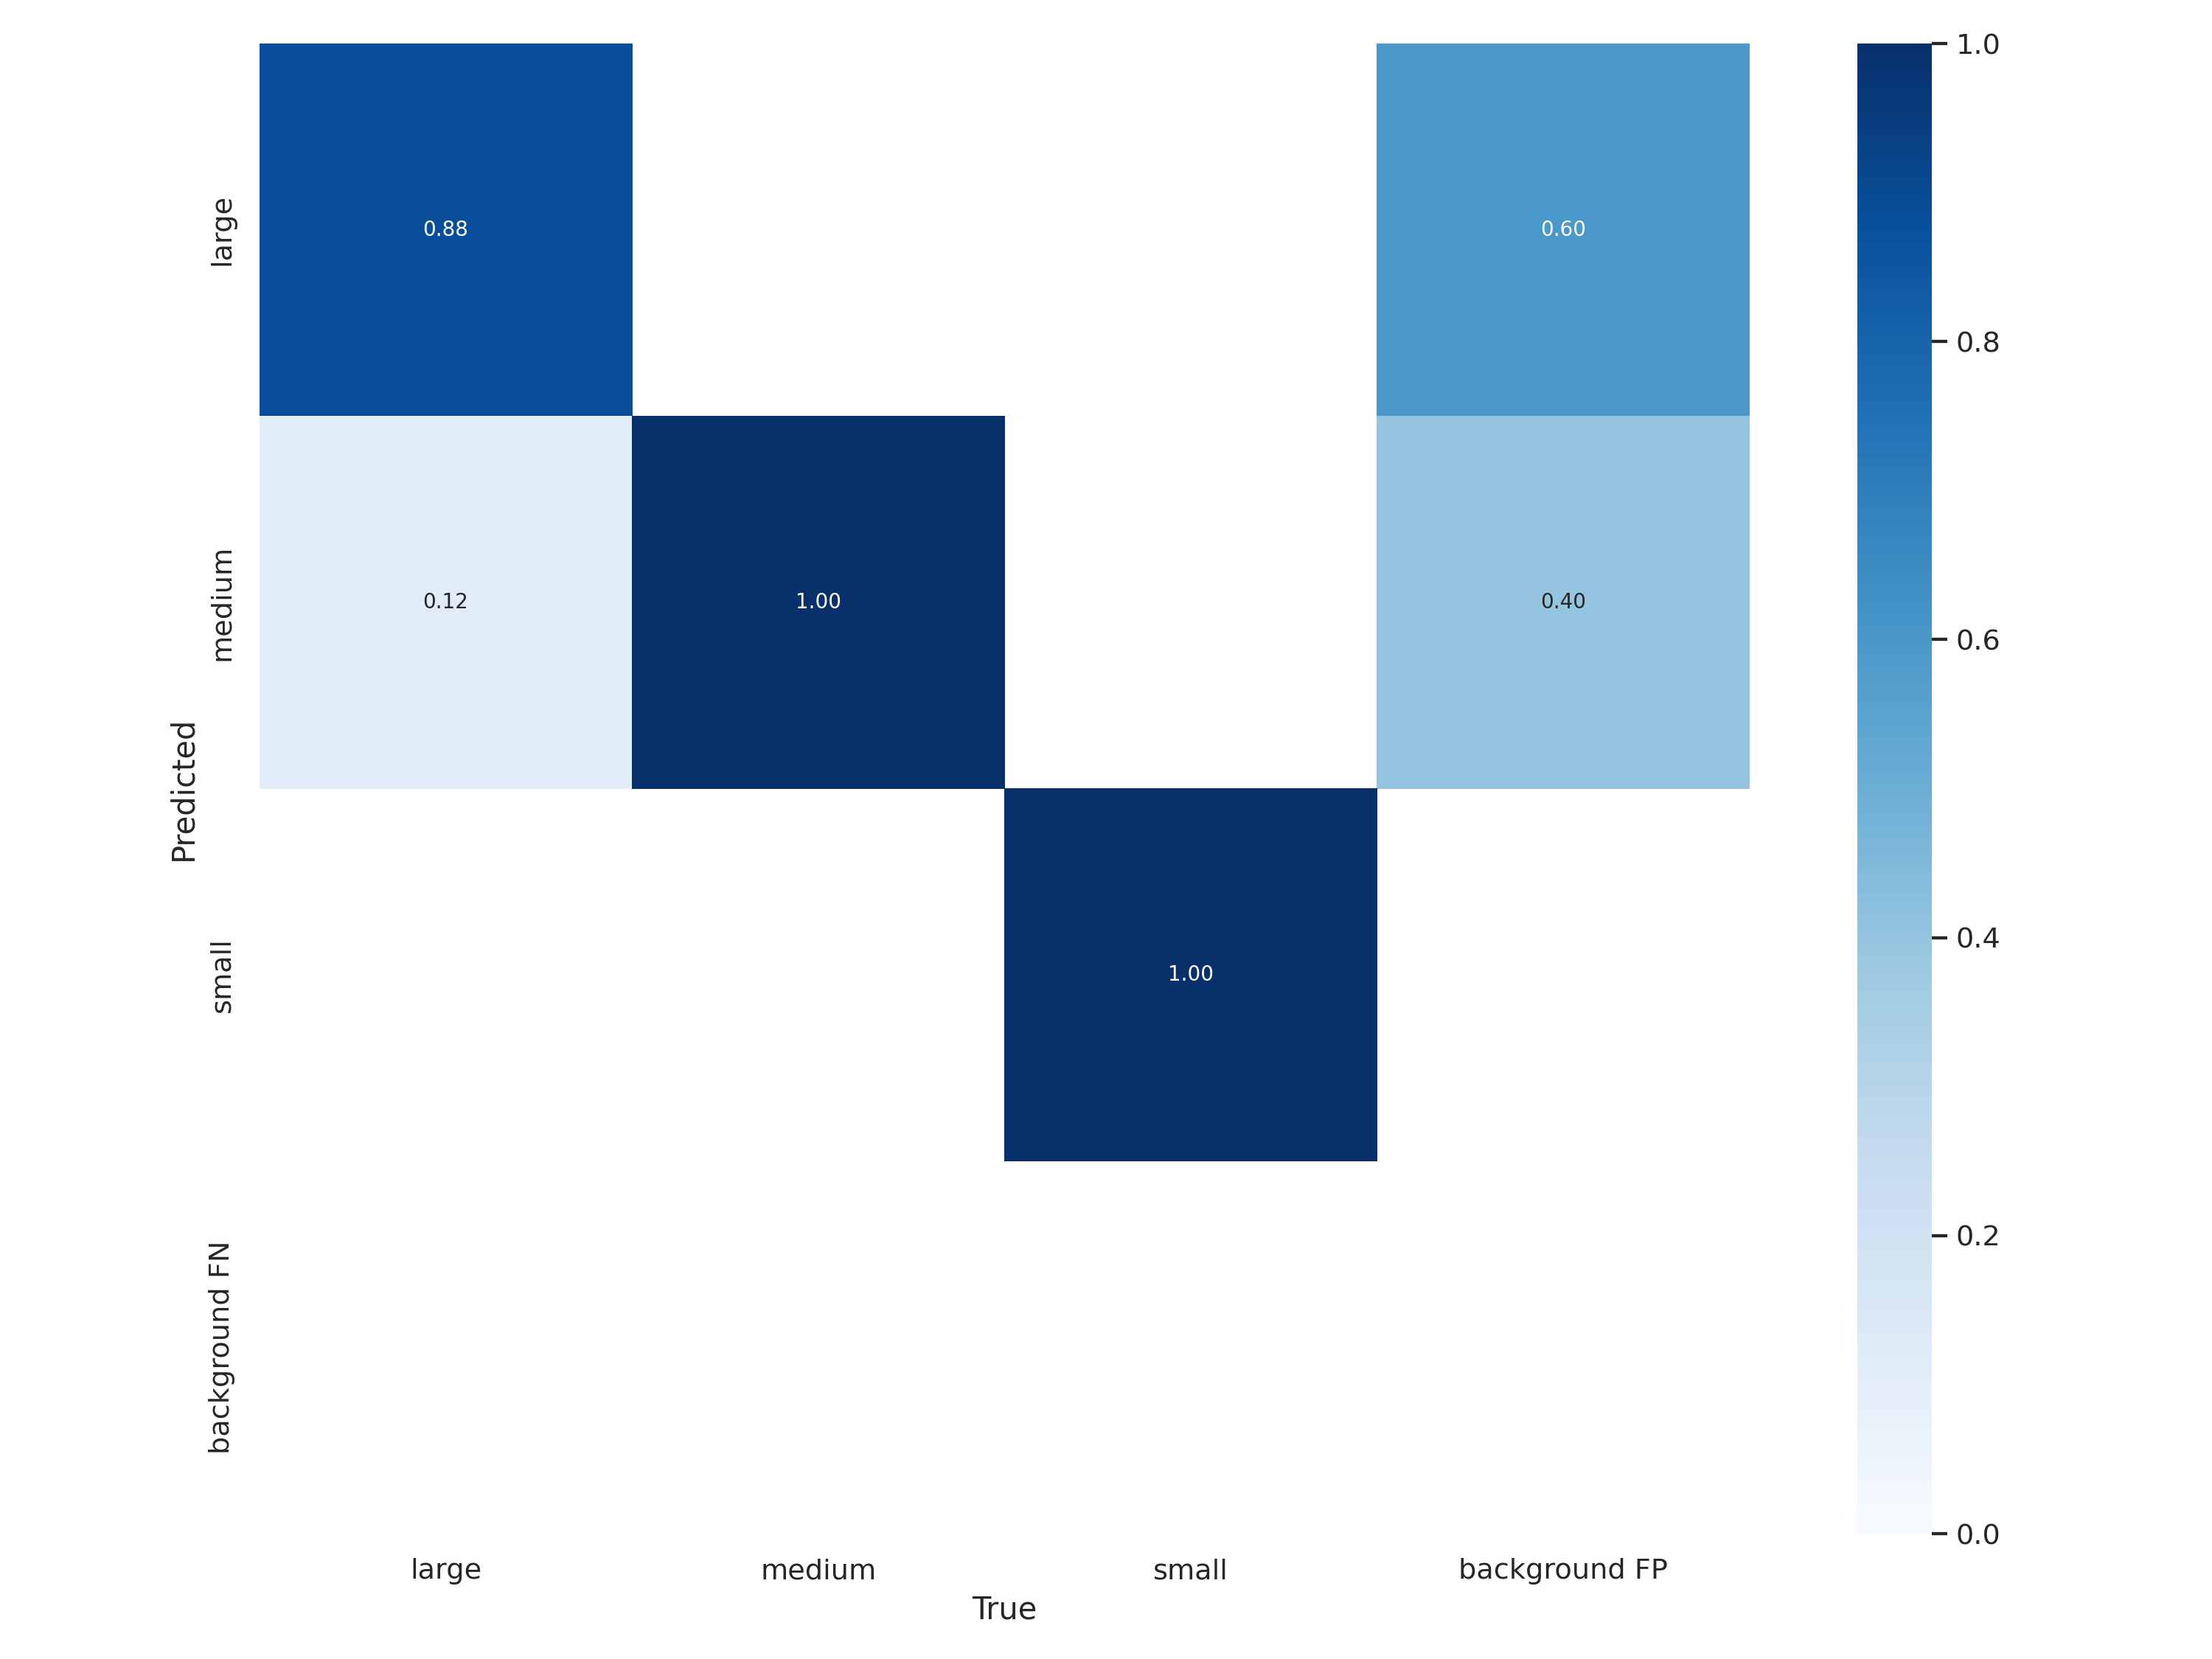

In [ ]:
# DISPLAY CONFUSUIN MATRIX
Image(filename='/content/yolov5/runs/train/yolov5s_results/confusion_matrix.png', width=700)

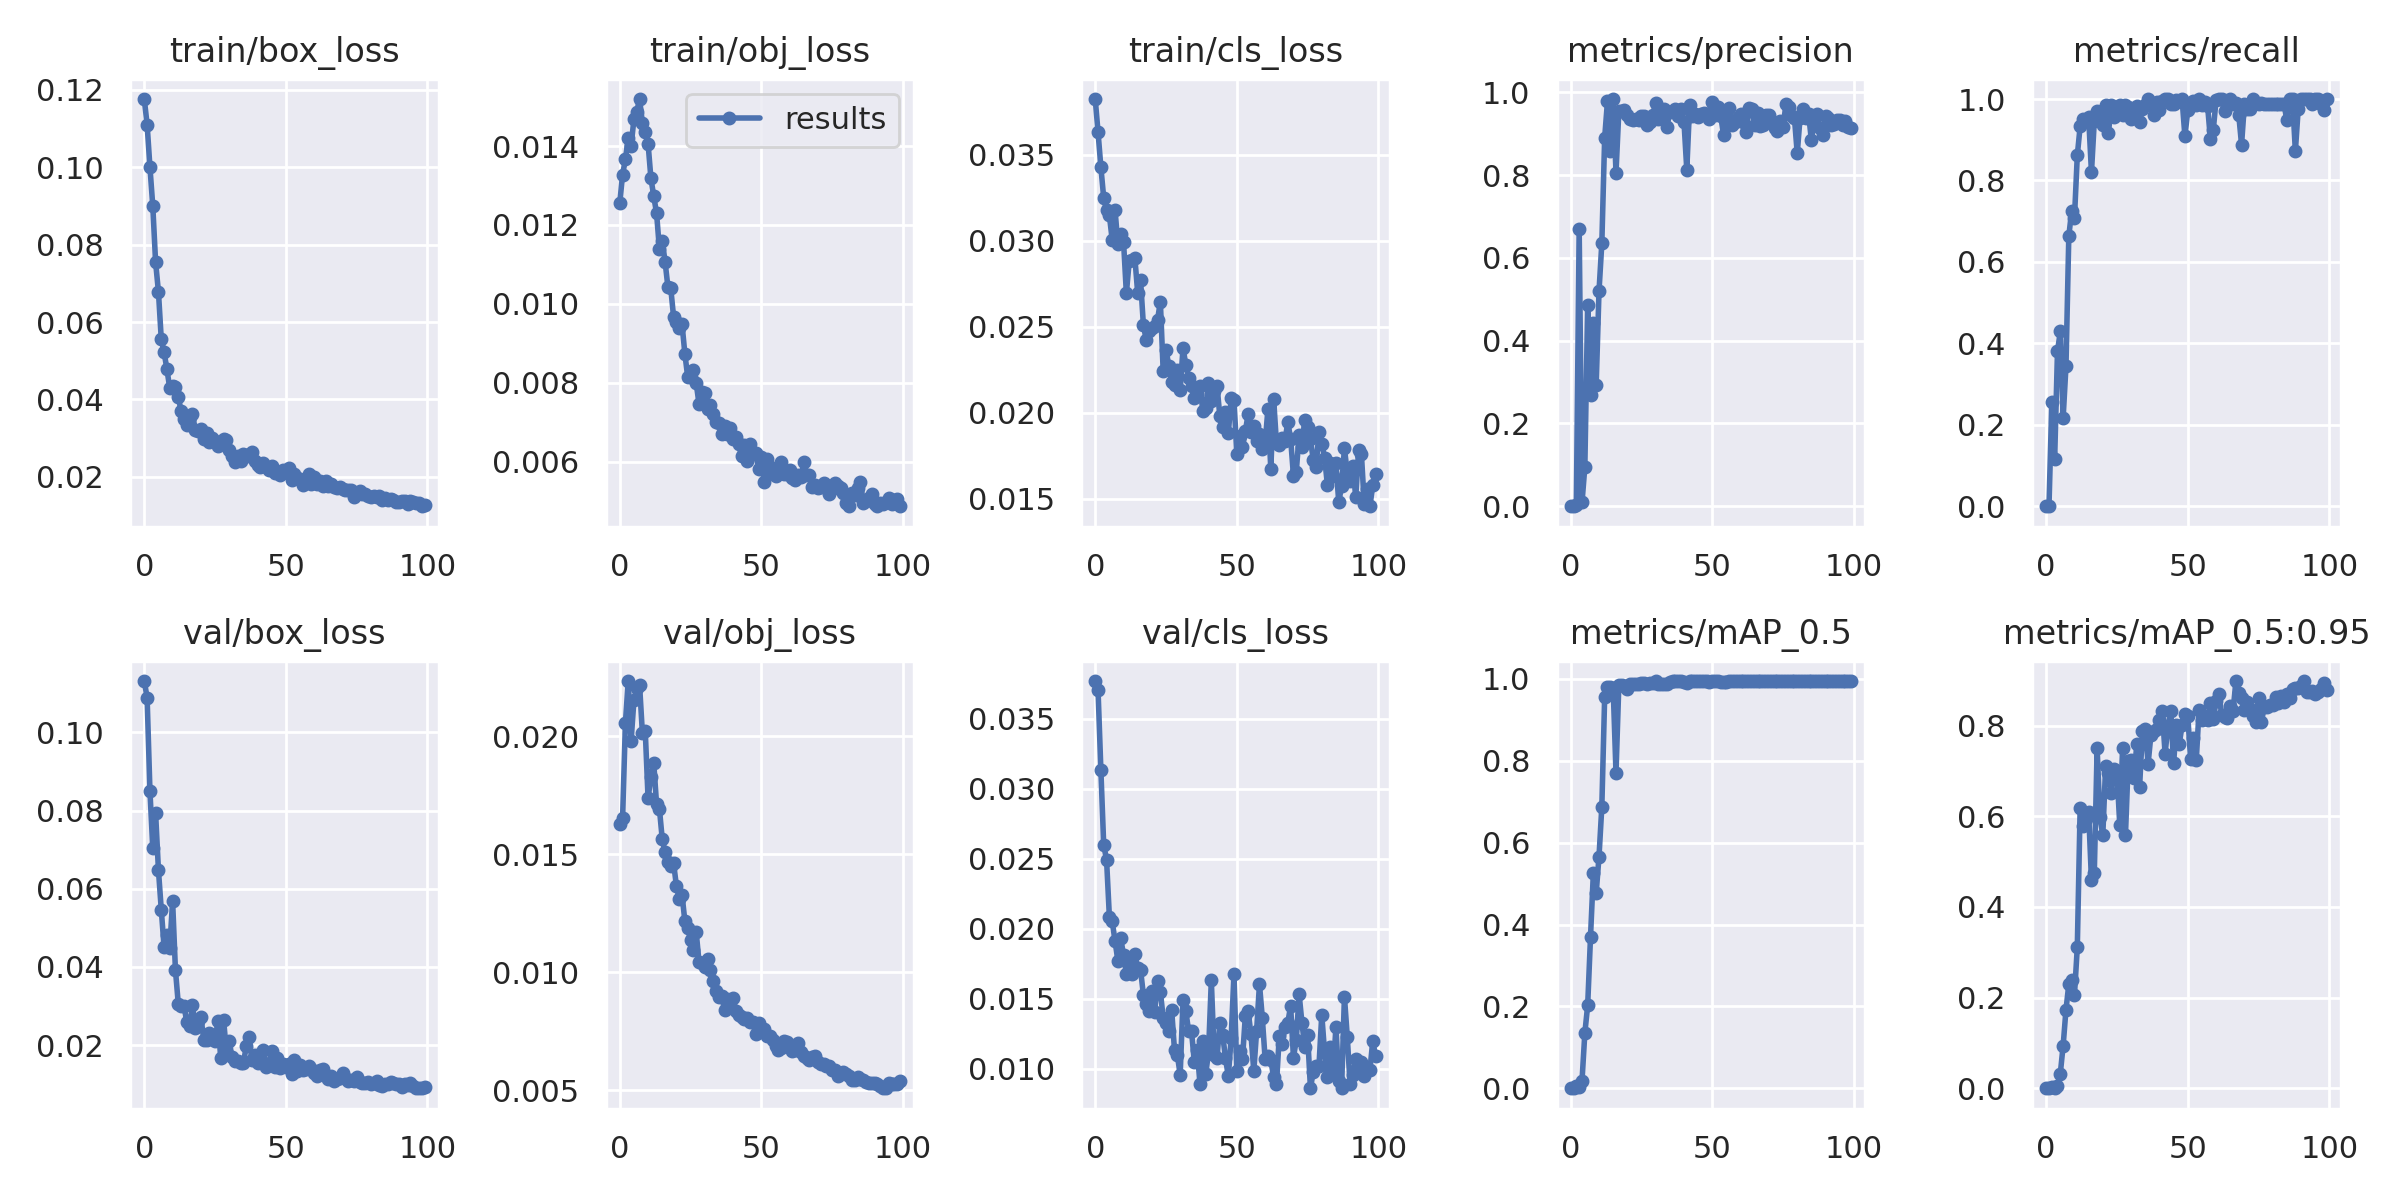

In [ ]:
# GRAPHS
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

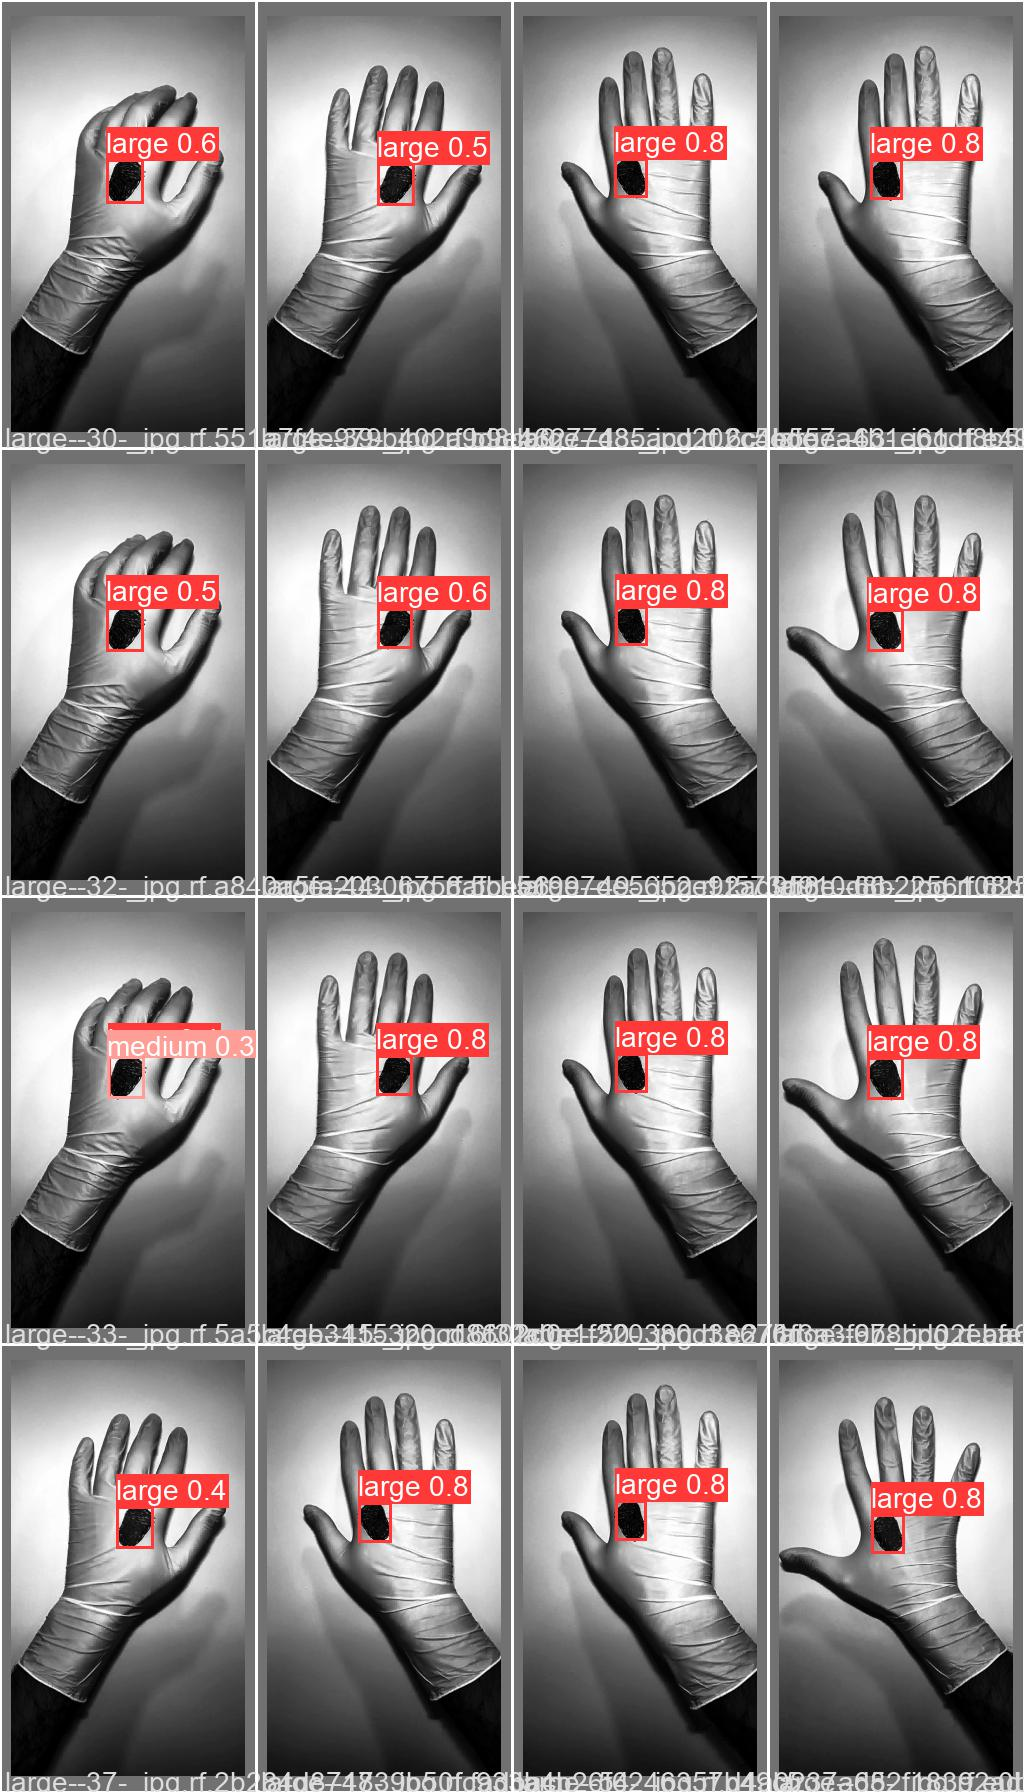

In [ ]:
# VALIDATION PREDICTION RESULTS
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch1_pred.jpg', width=1000)

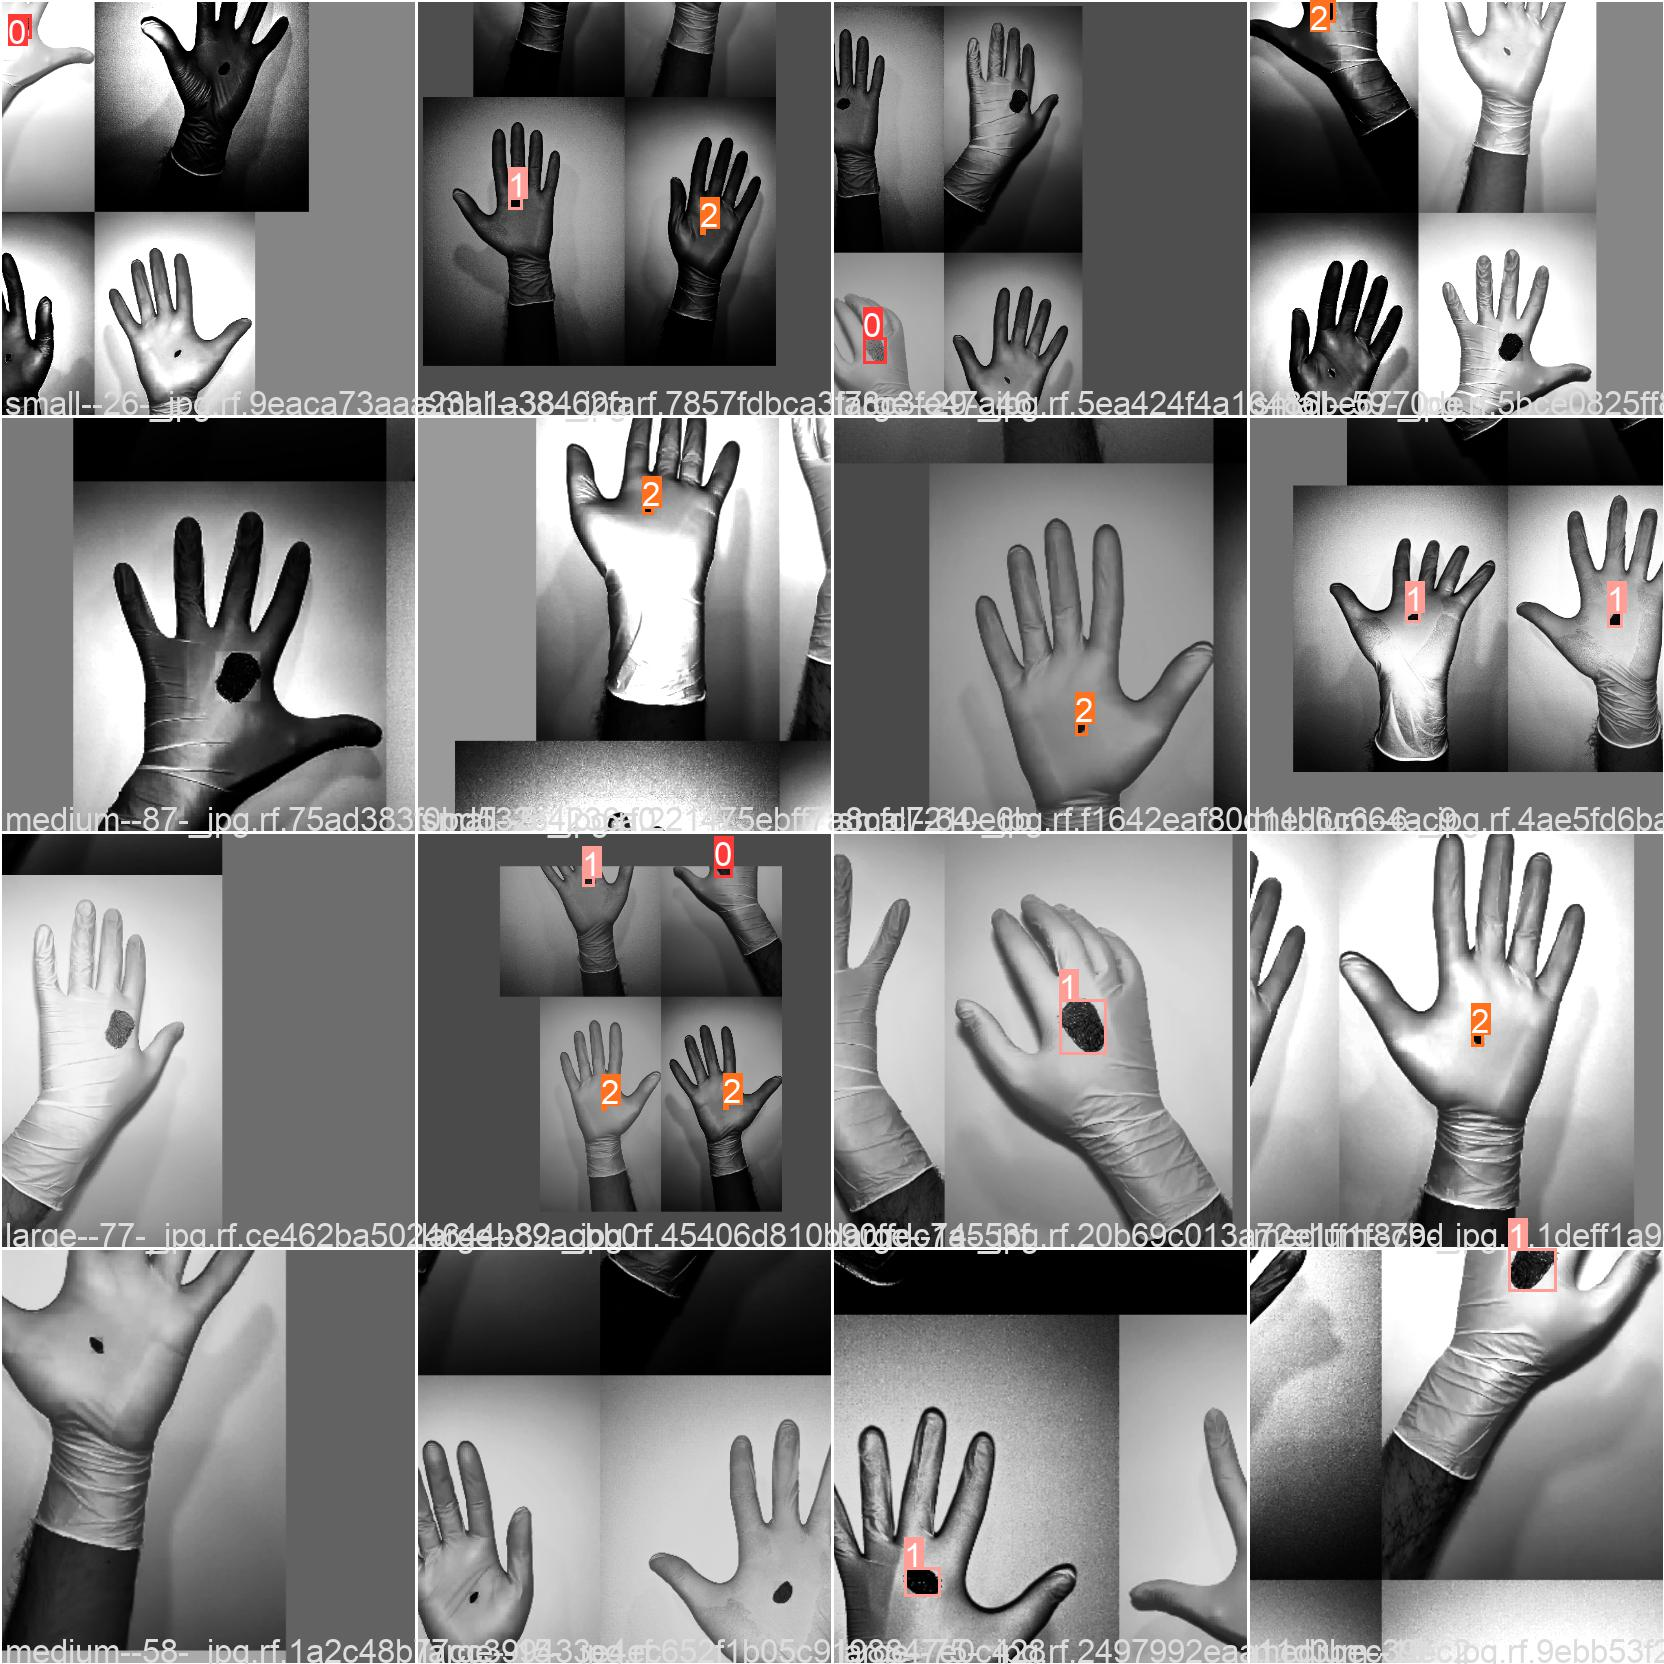

In [ ]:
# AUGMENTED TRAINING RESULTS
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=1000)

In [ ]:
# TRAINED WEIGHTS 
%ls runs/
%ls runs/train/yolov5s_results/weights

train/
best.pt  last.pt


In [ ]:
# USE BEST WEIGHTS
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/glove_dataset/test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/glove-defect-measurement-11/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/28 /content/yolov5/glove-defect-measurement-11/test/images/large--64-_jpg.rf.078bd248ff94b66f6b9a9e18ee11f7dd.jpg: 416x256 1 large, Done. (0.018s)
image 2/28 /content/yolov5/glove-defect-measurement-11/test/images/large--65-_jpg.rf.478b3d5fcdea67fa71243eeb86bb9ec9.jpg: 416x256 1 large, Done. (0.010s)

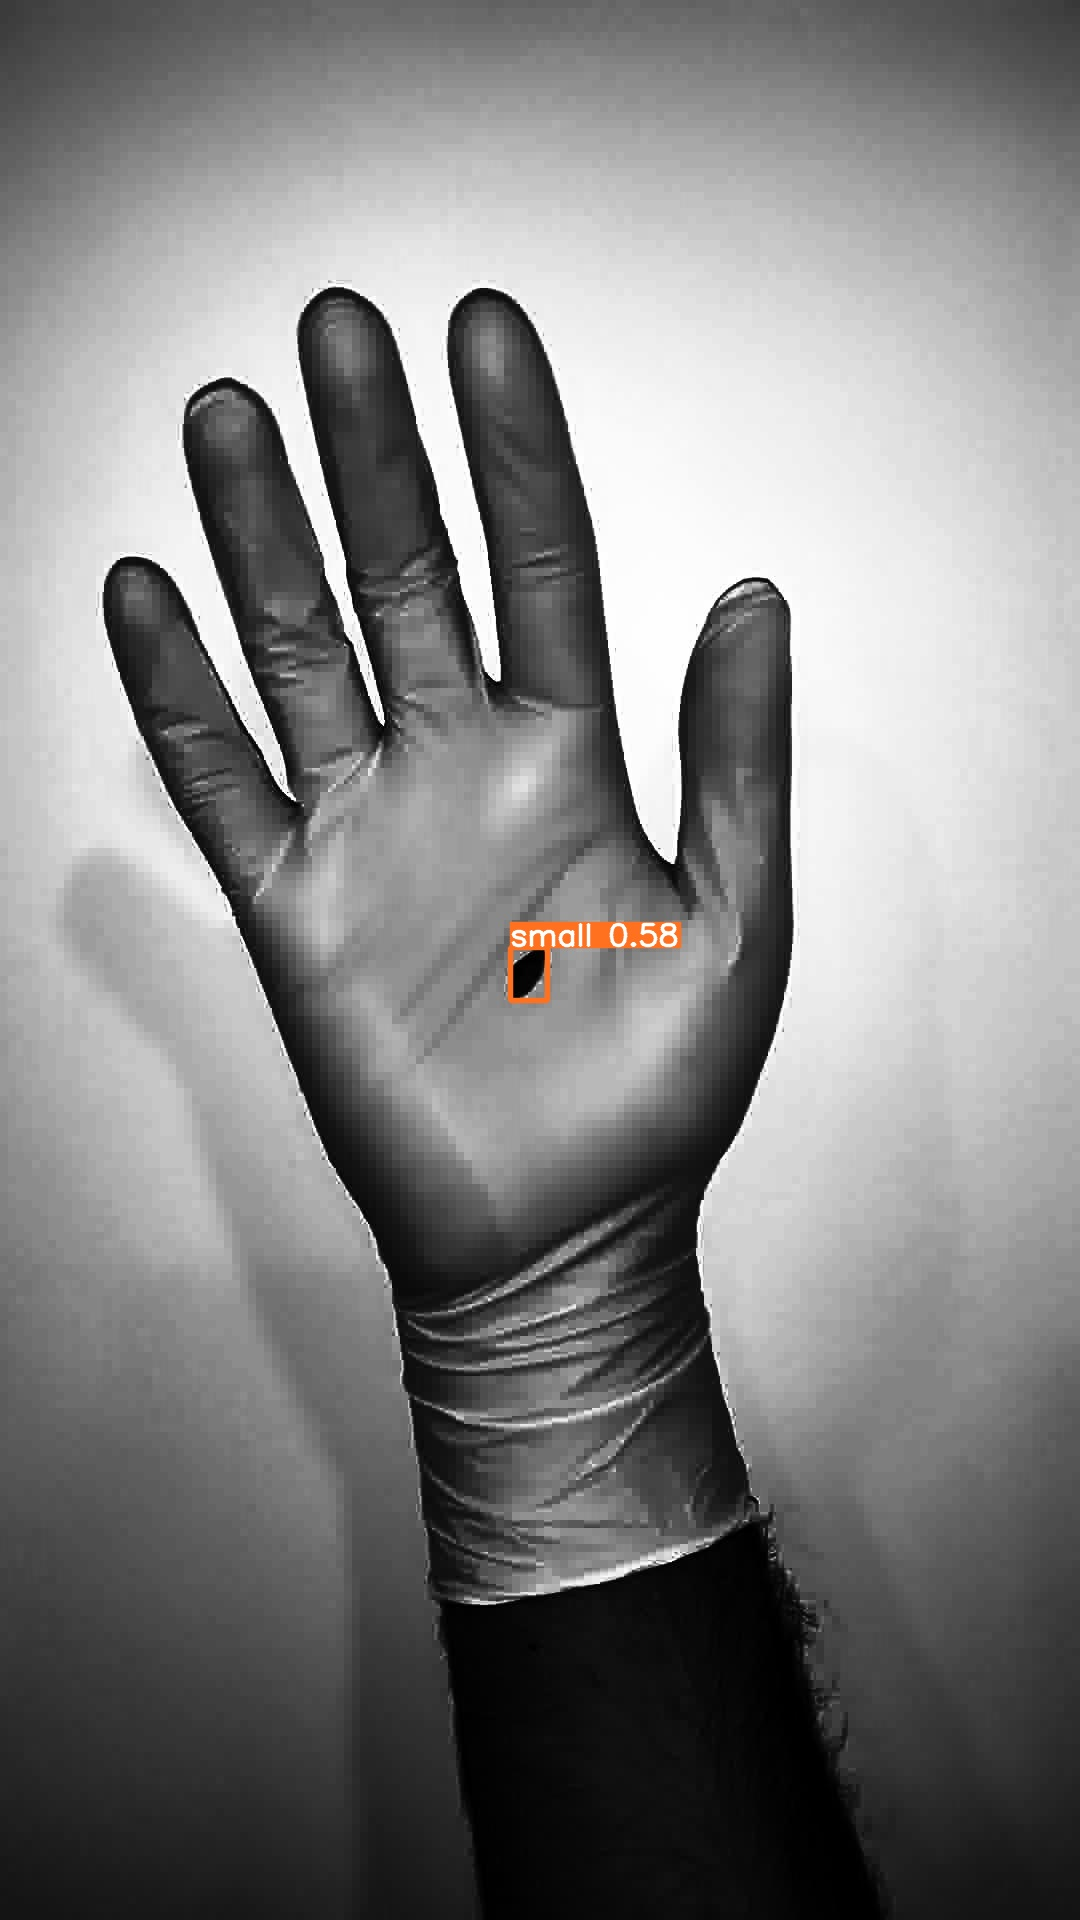

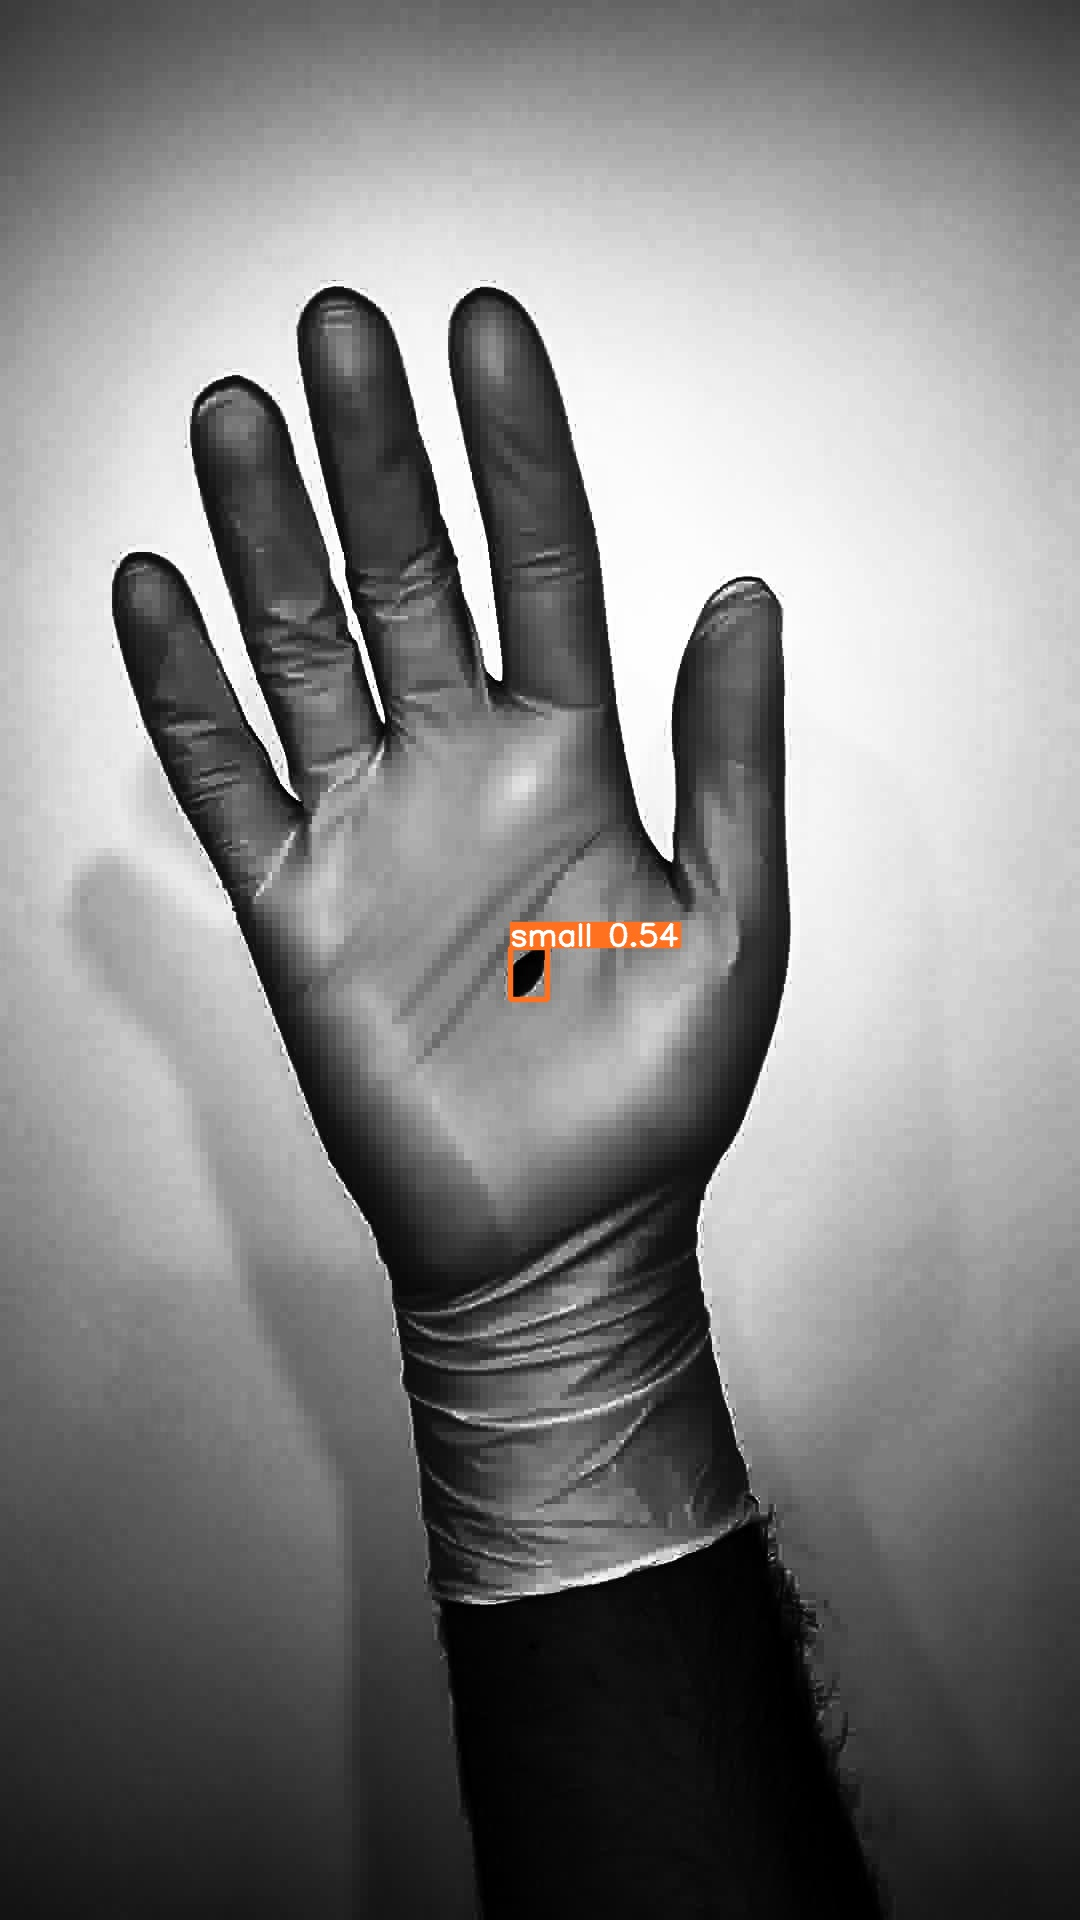

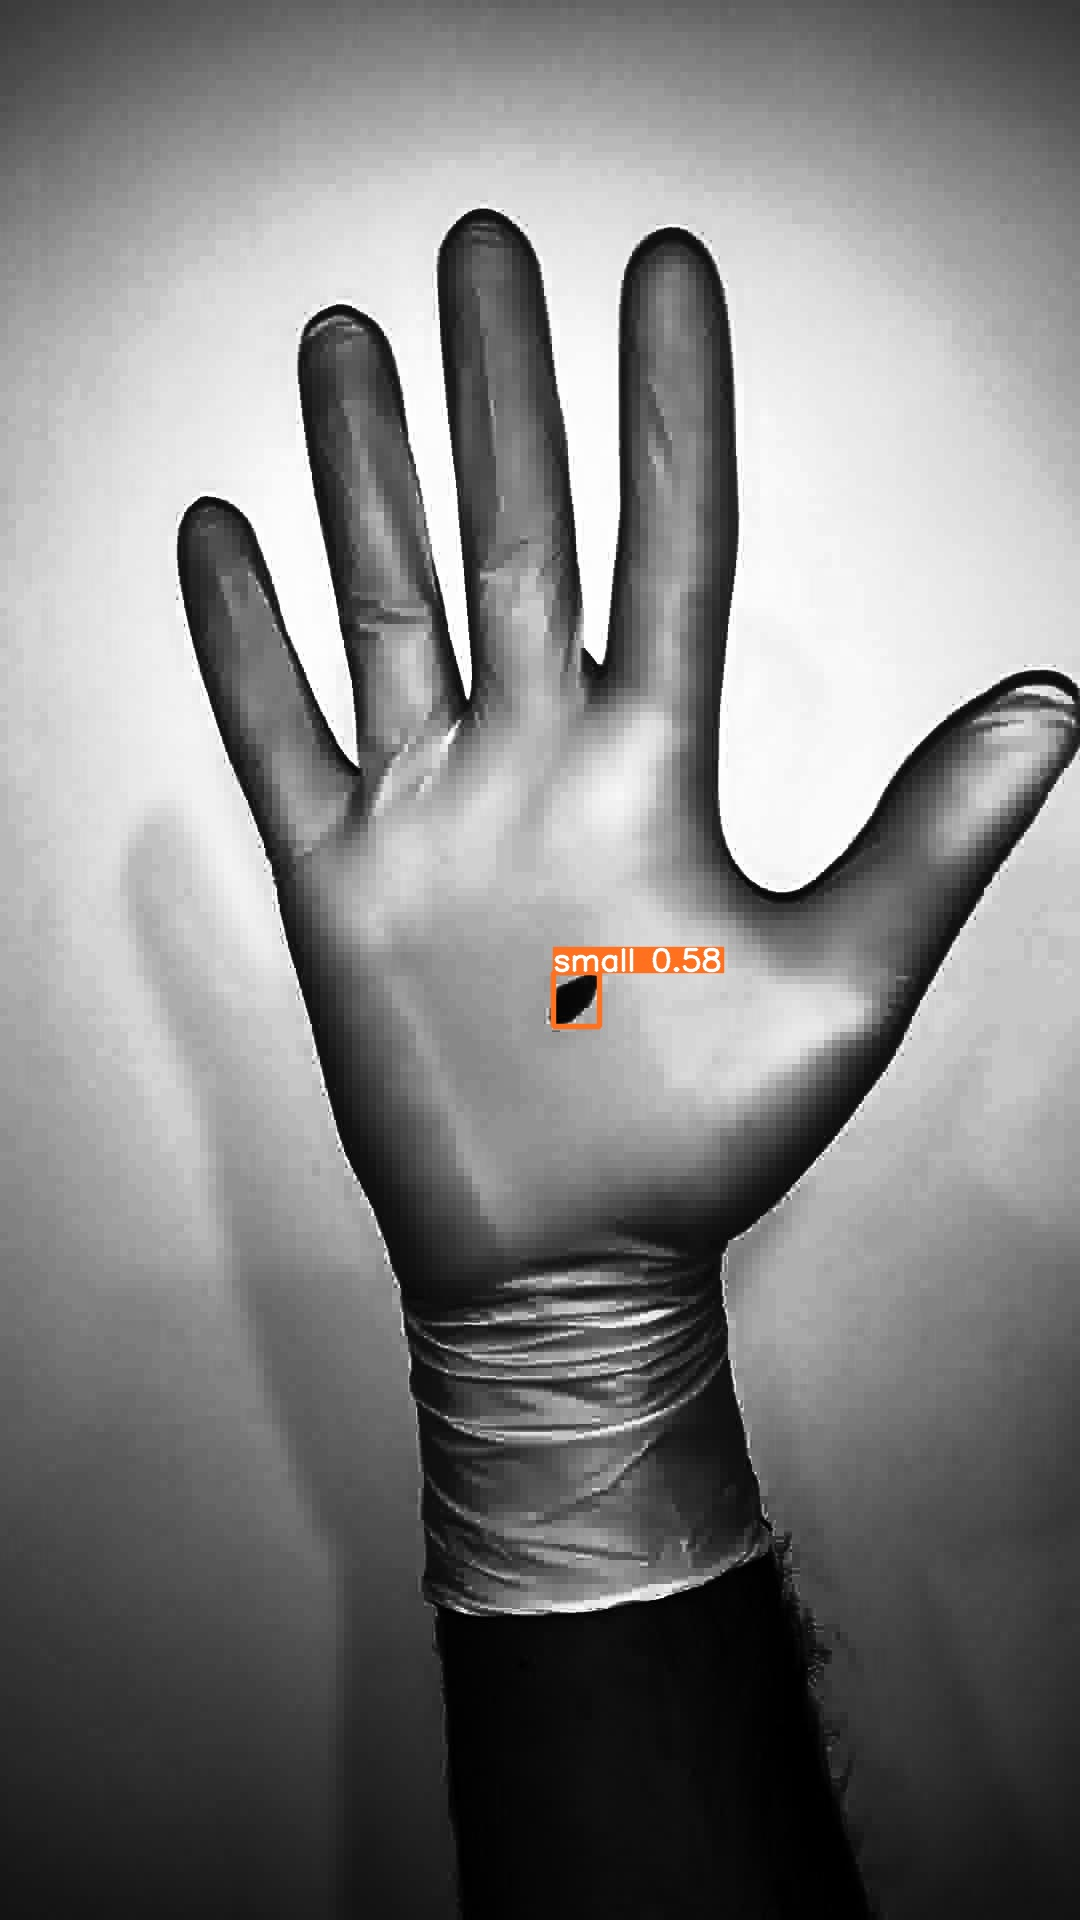

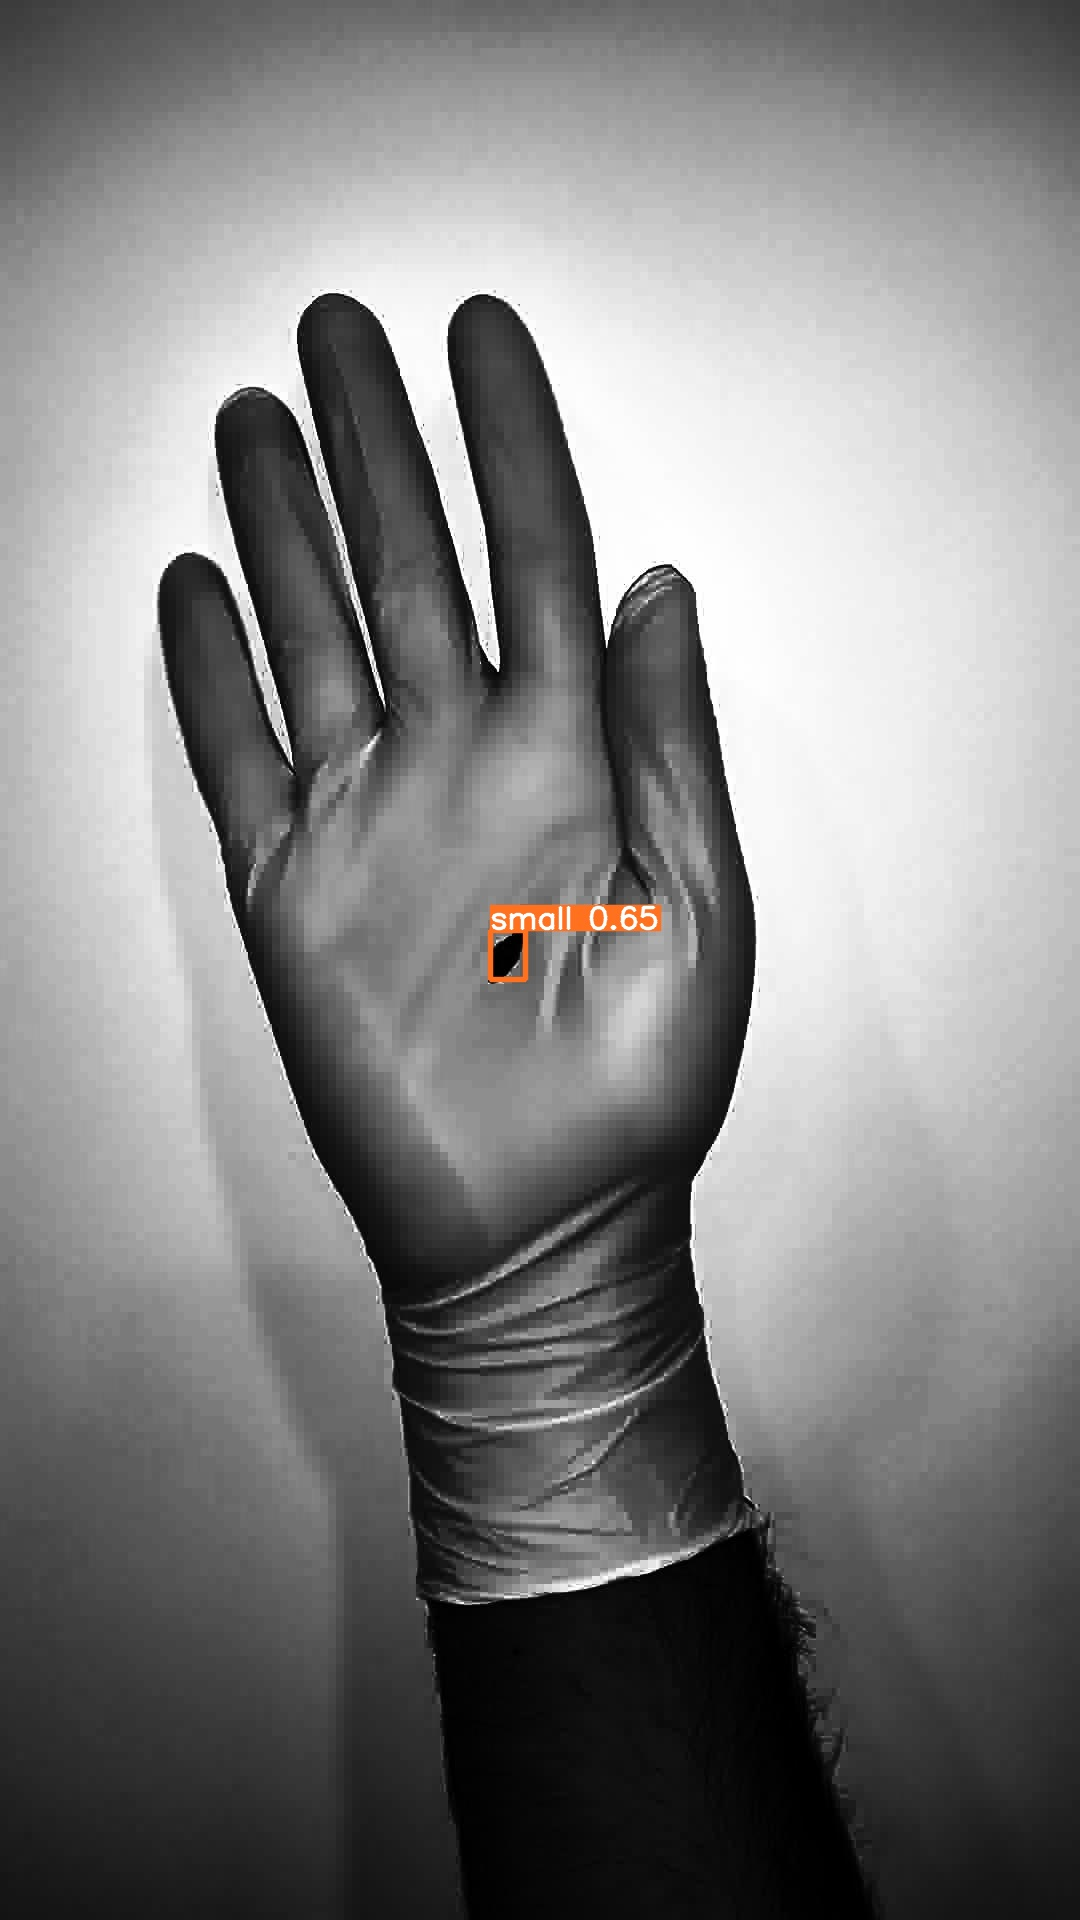

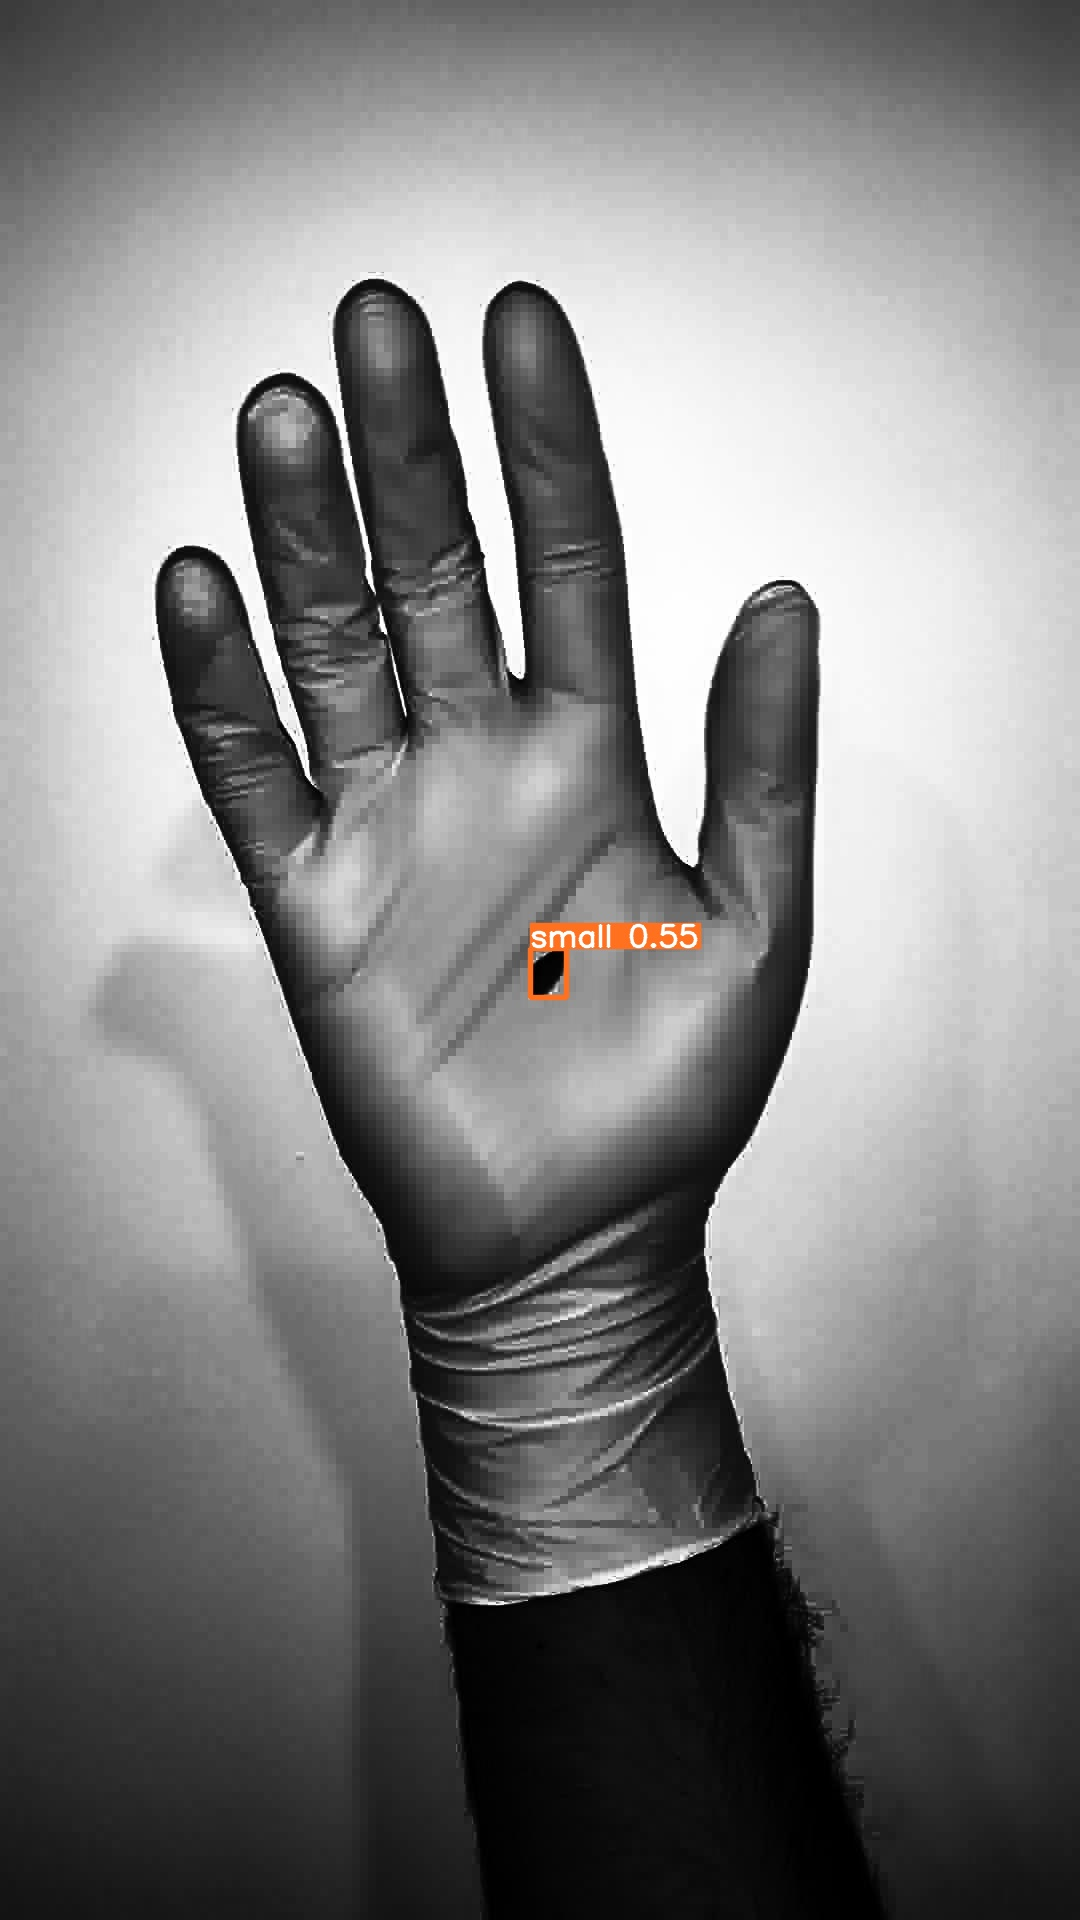

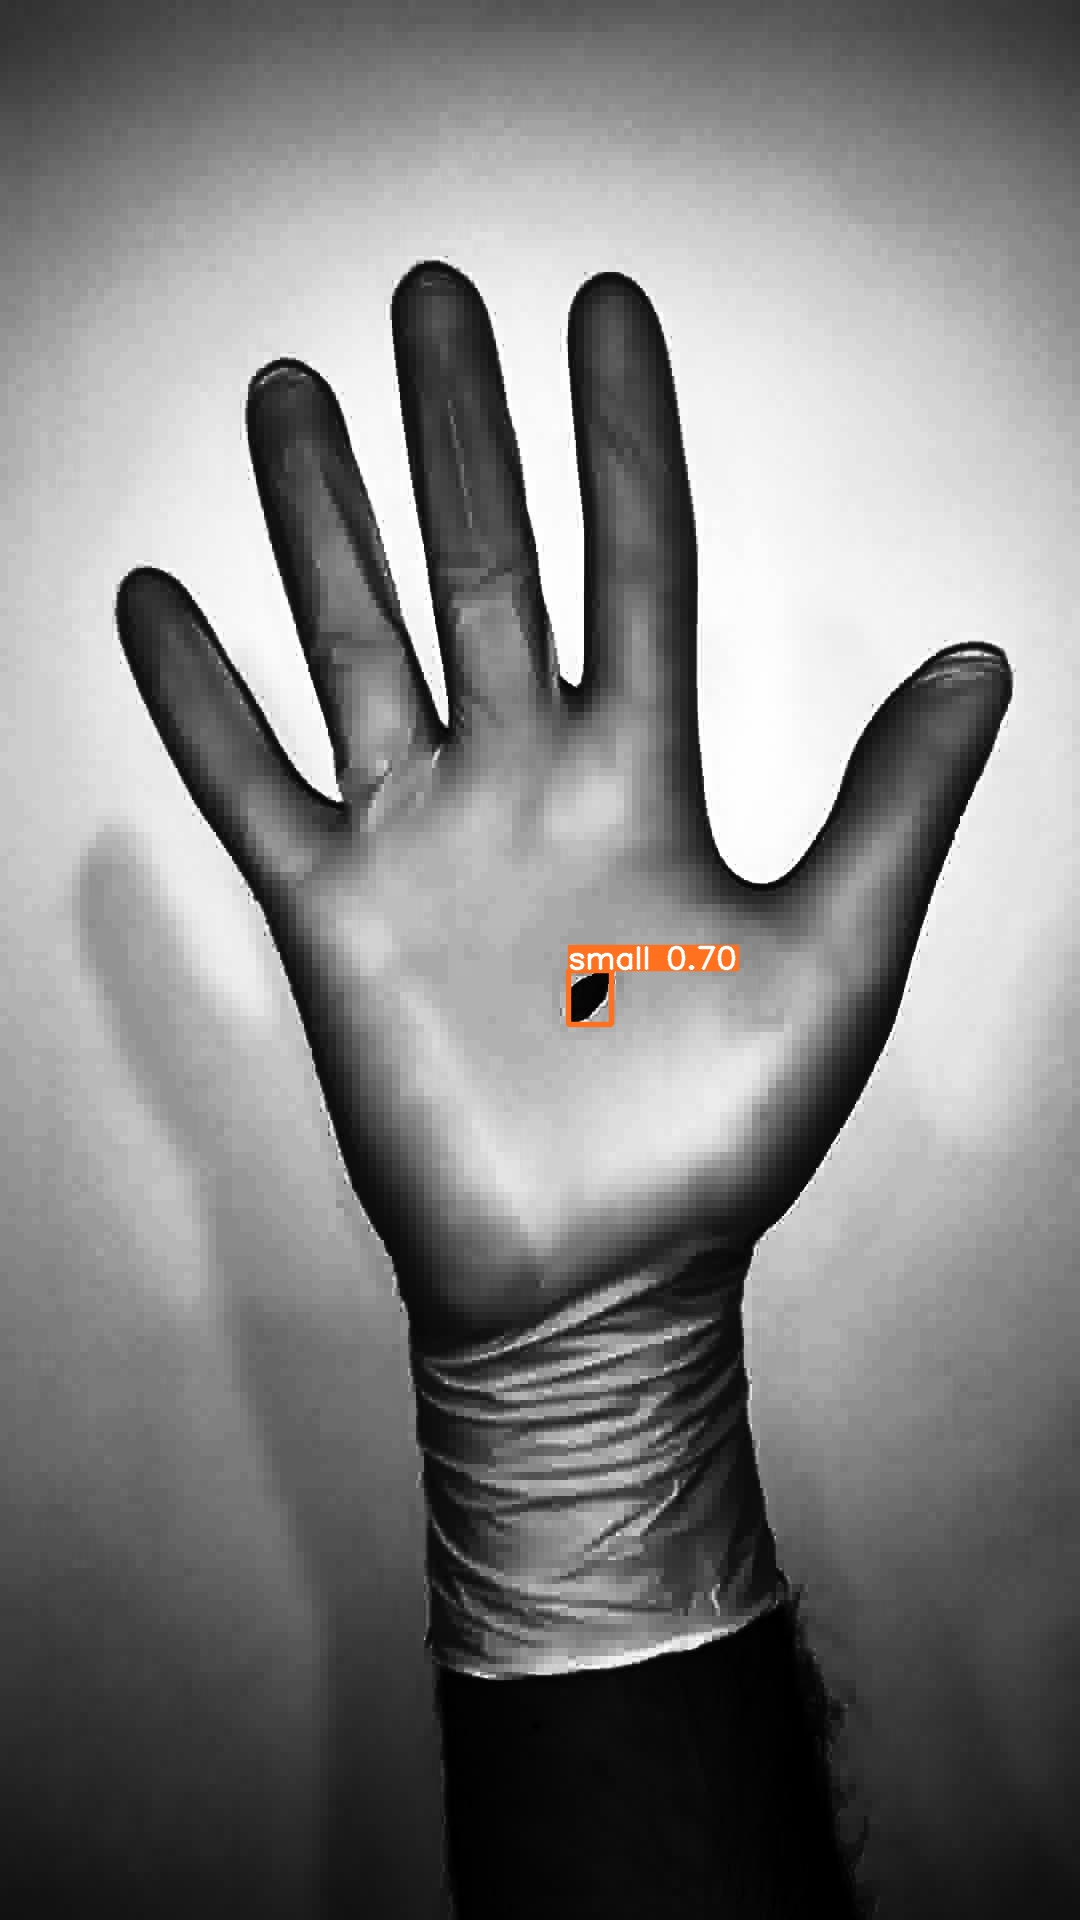

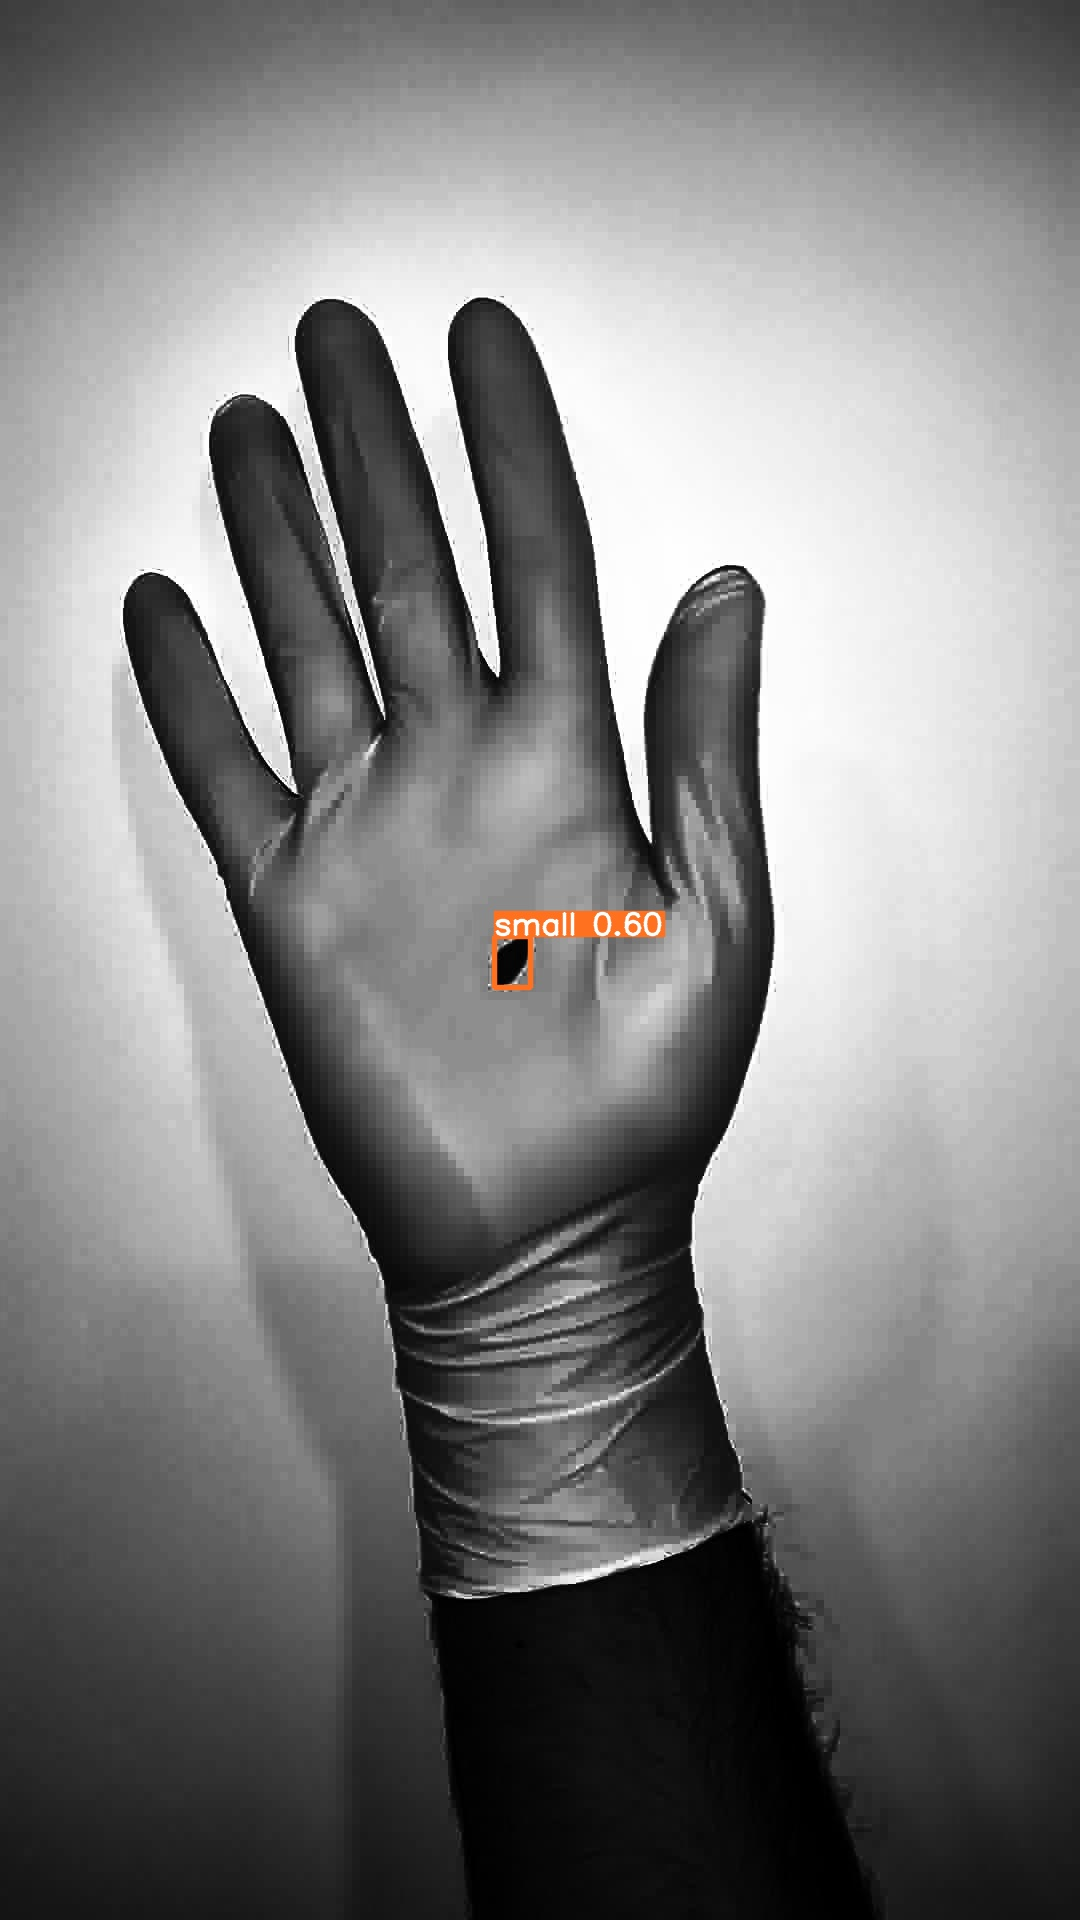

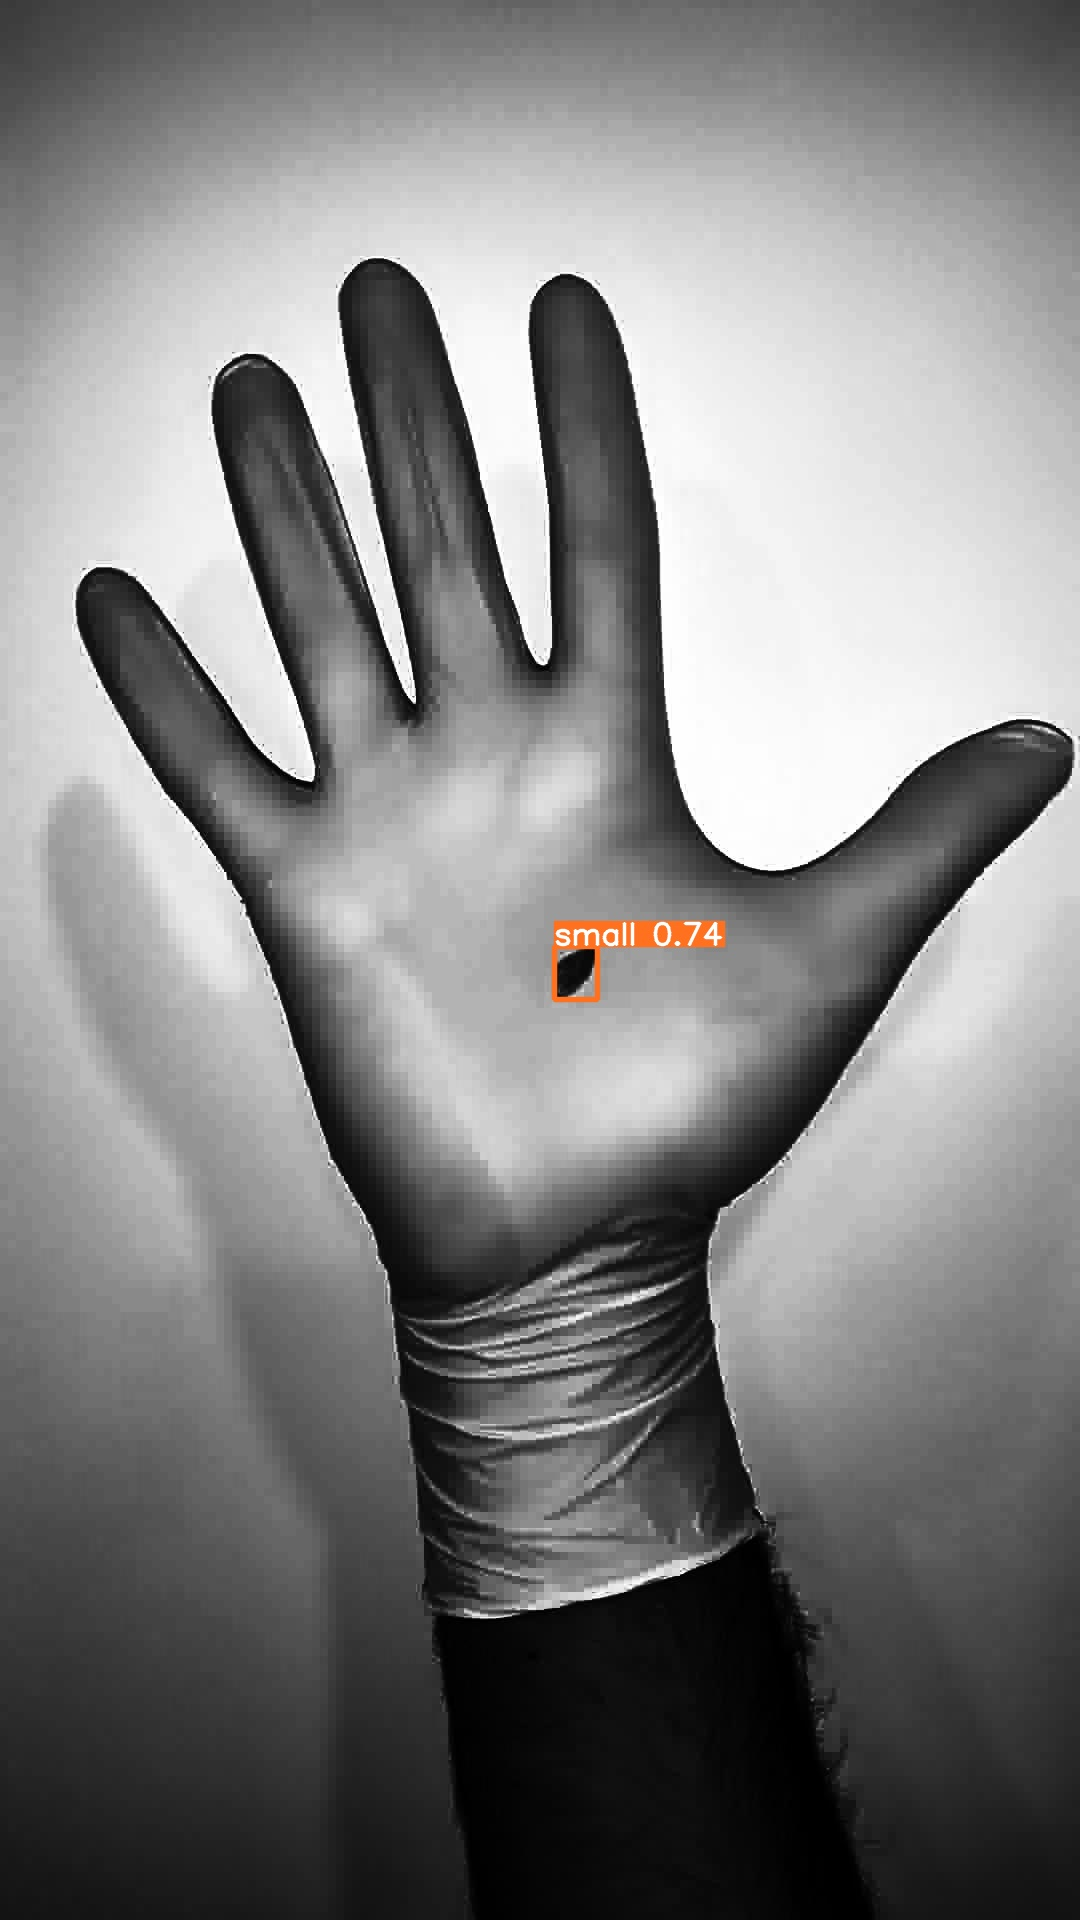

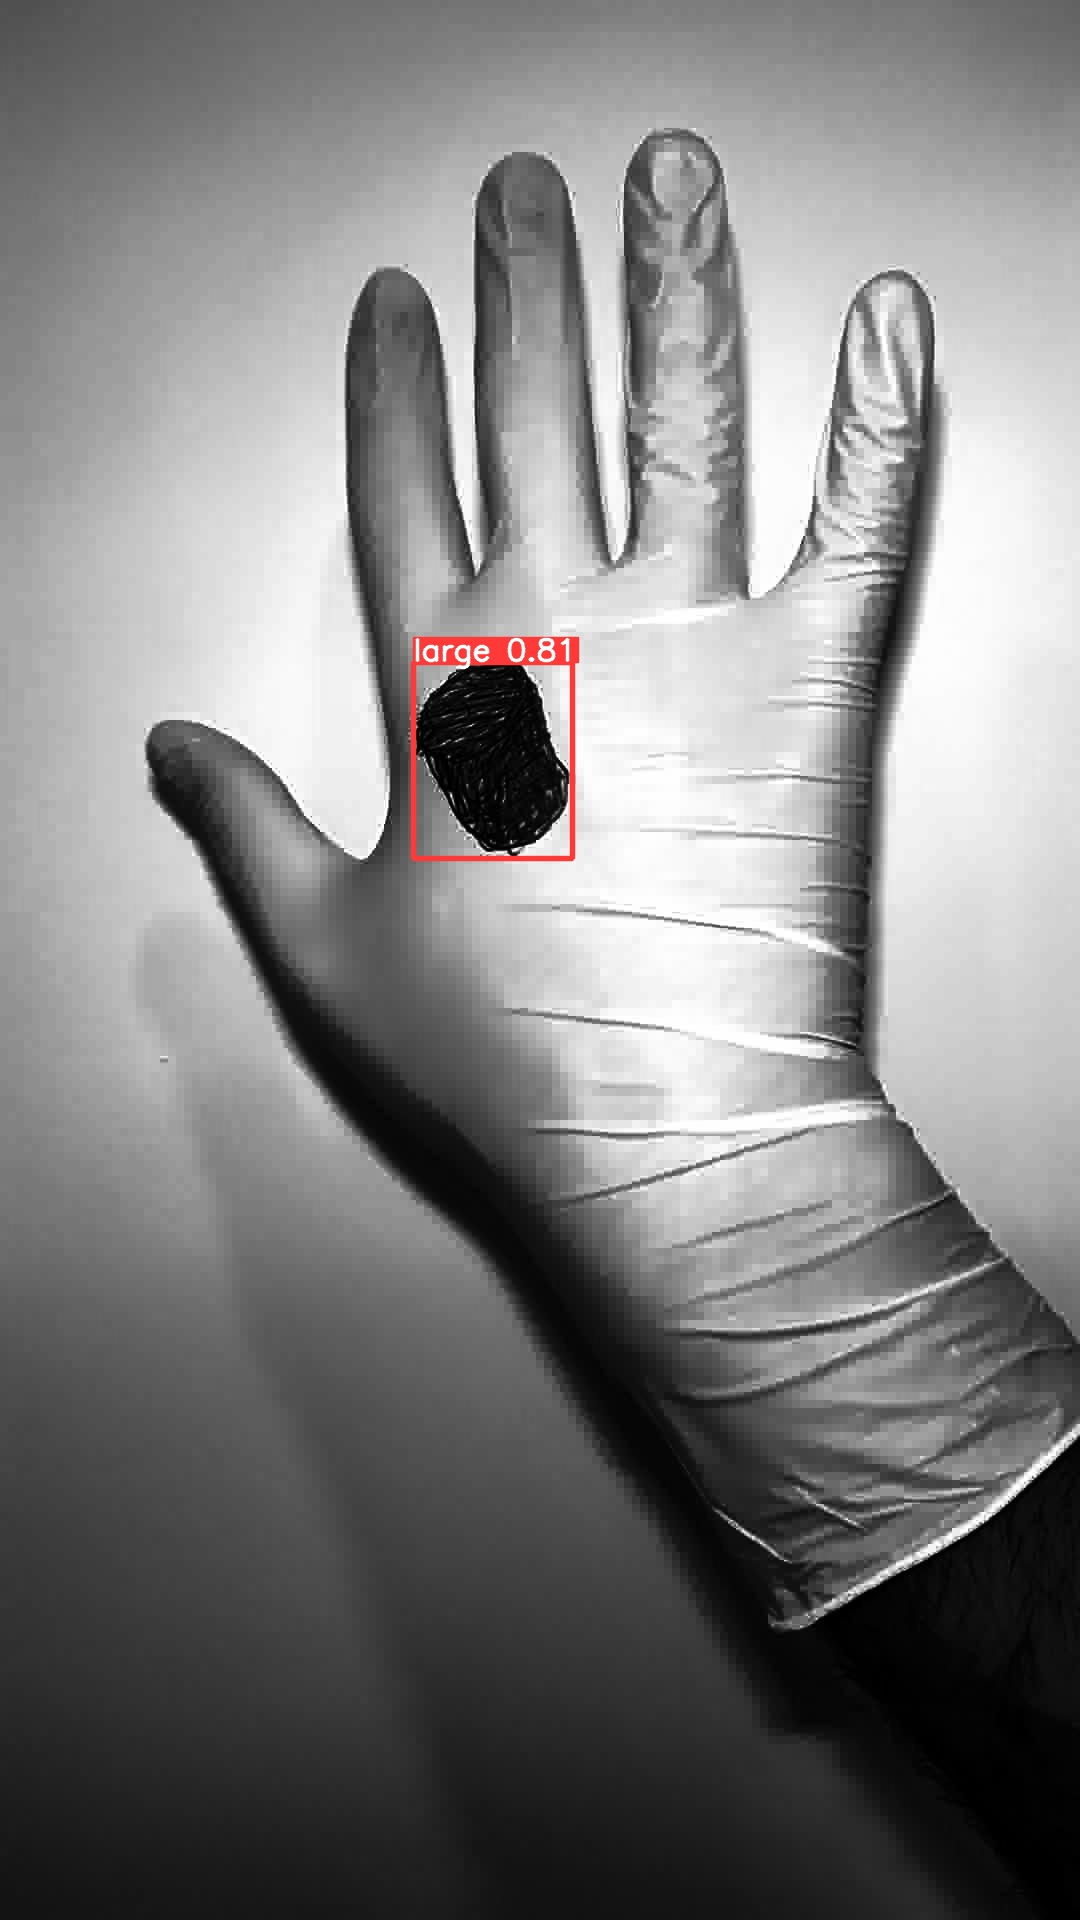

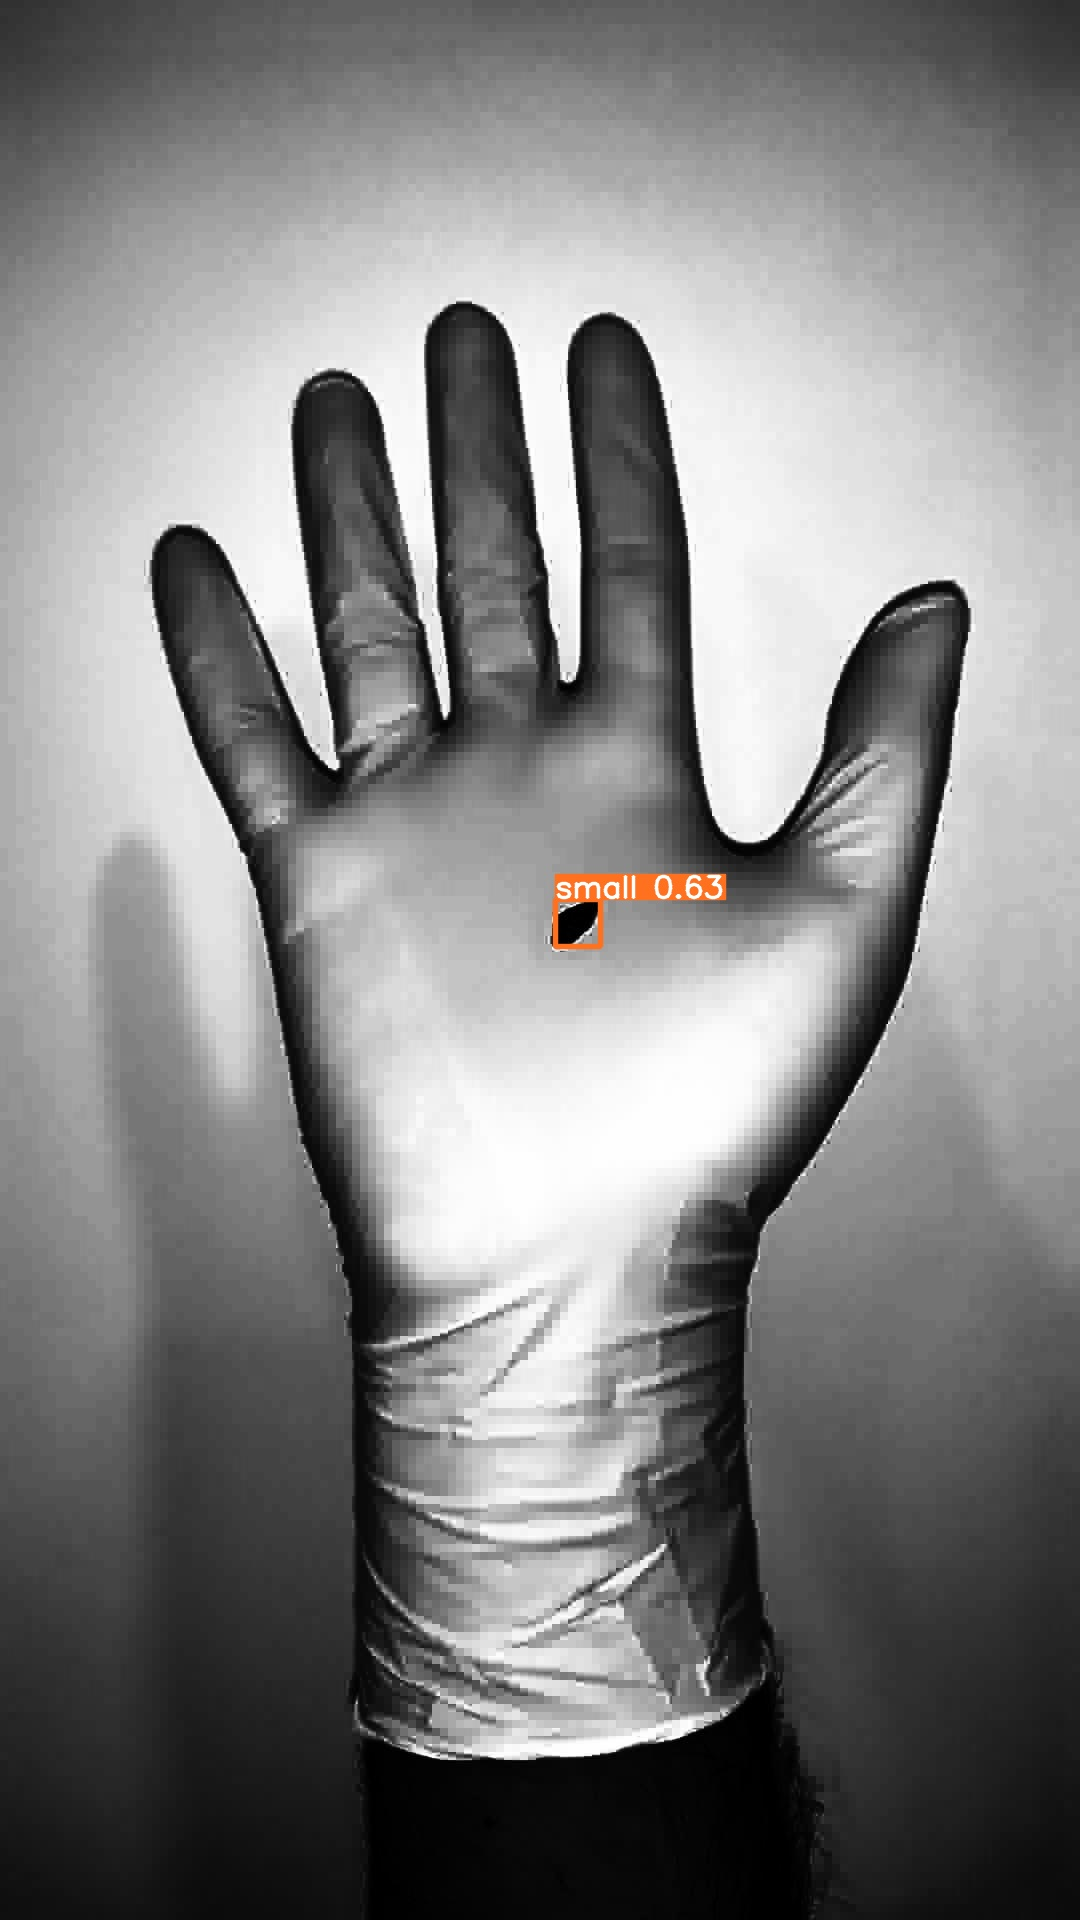

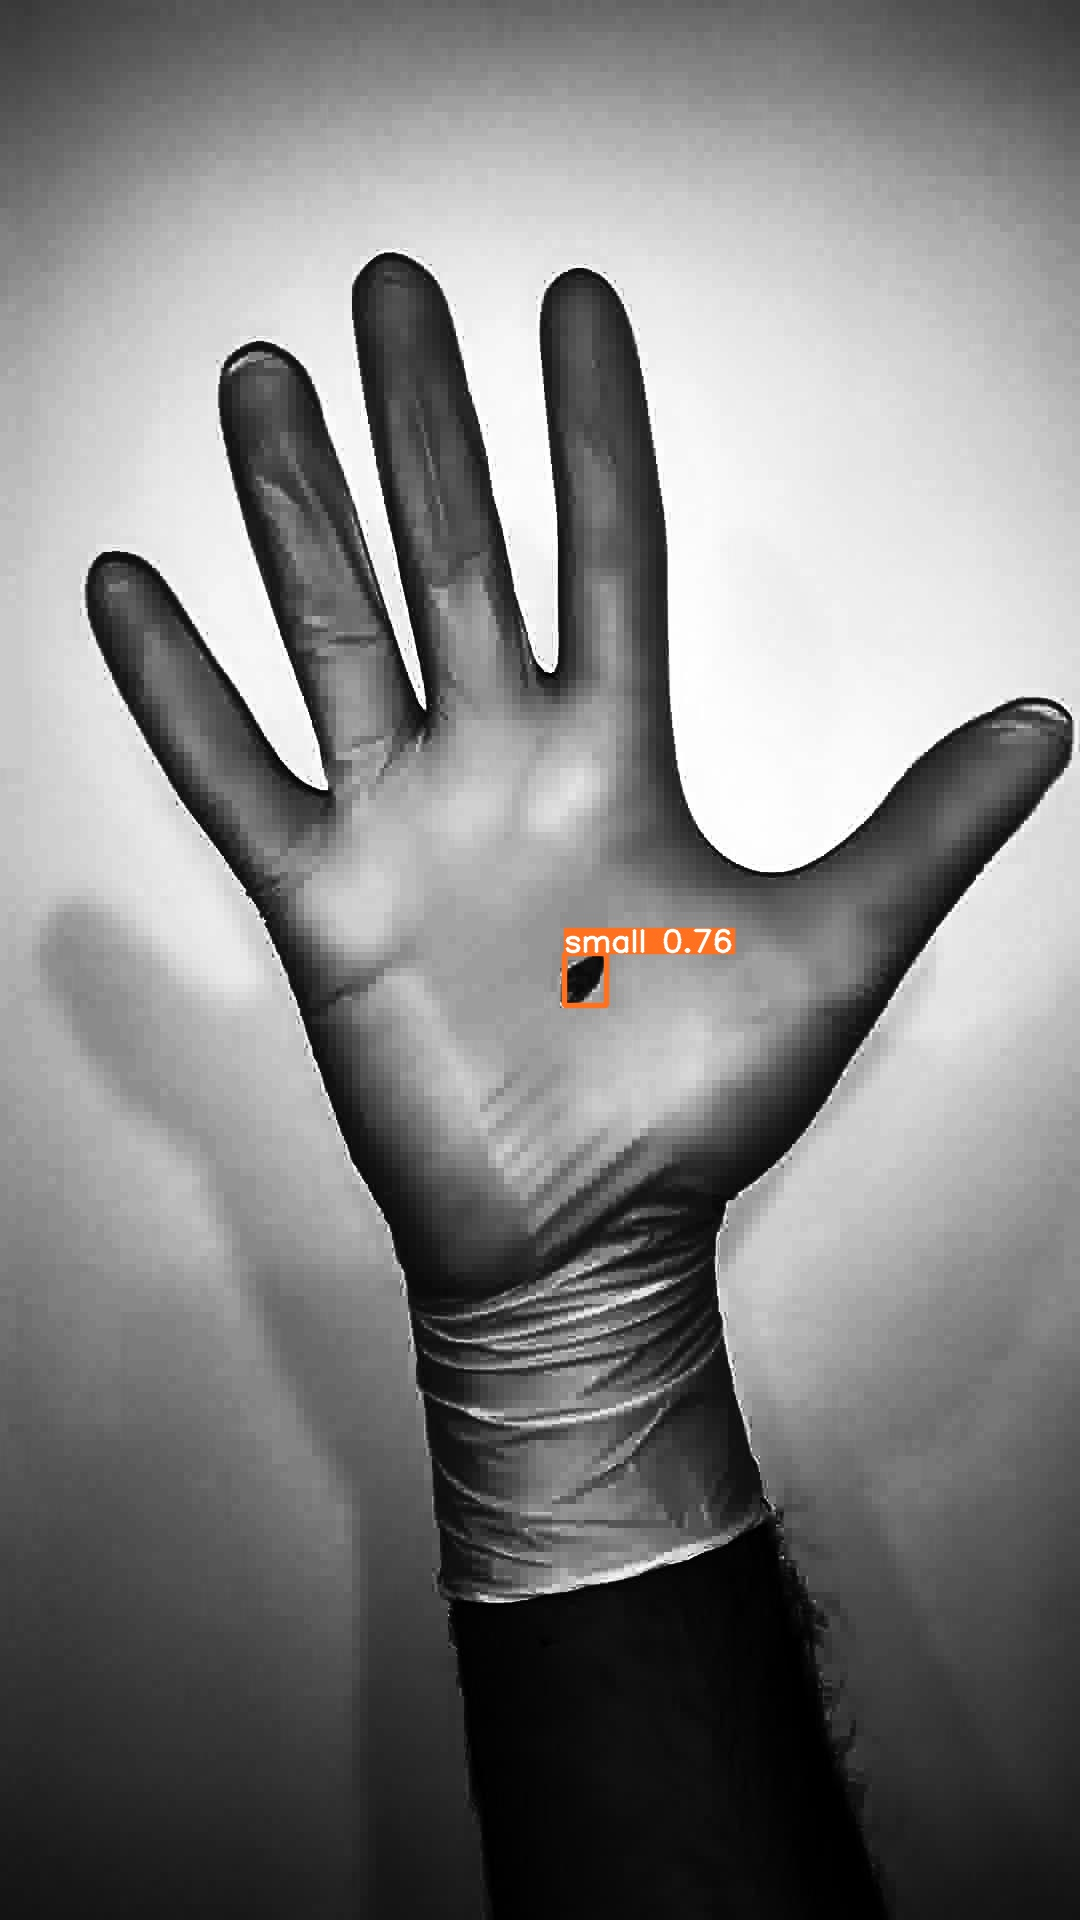

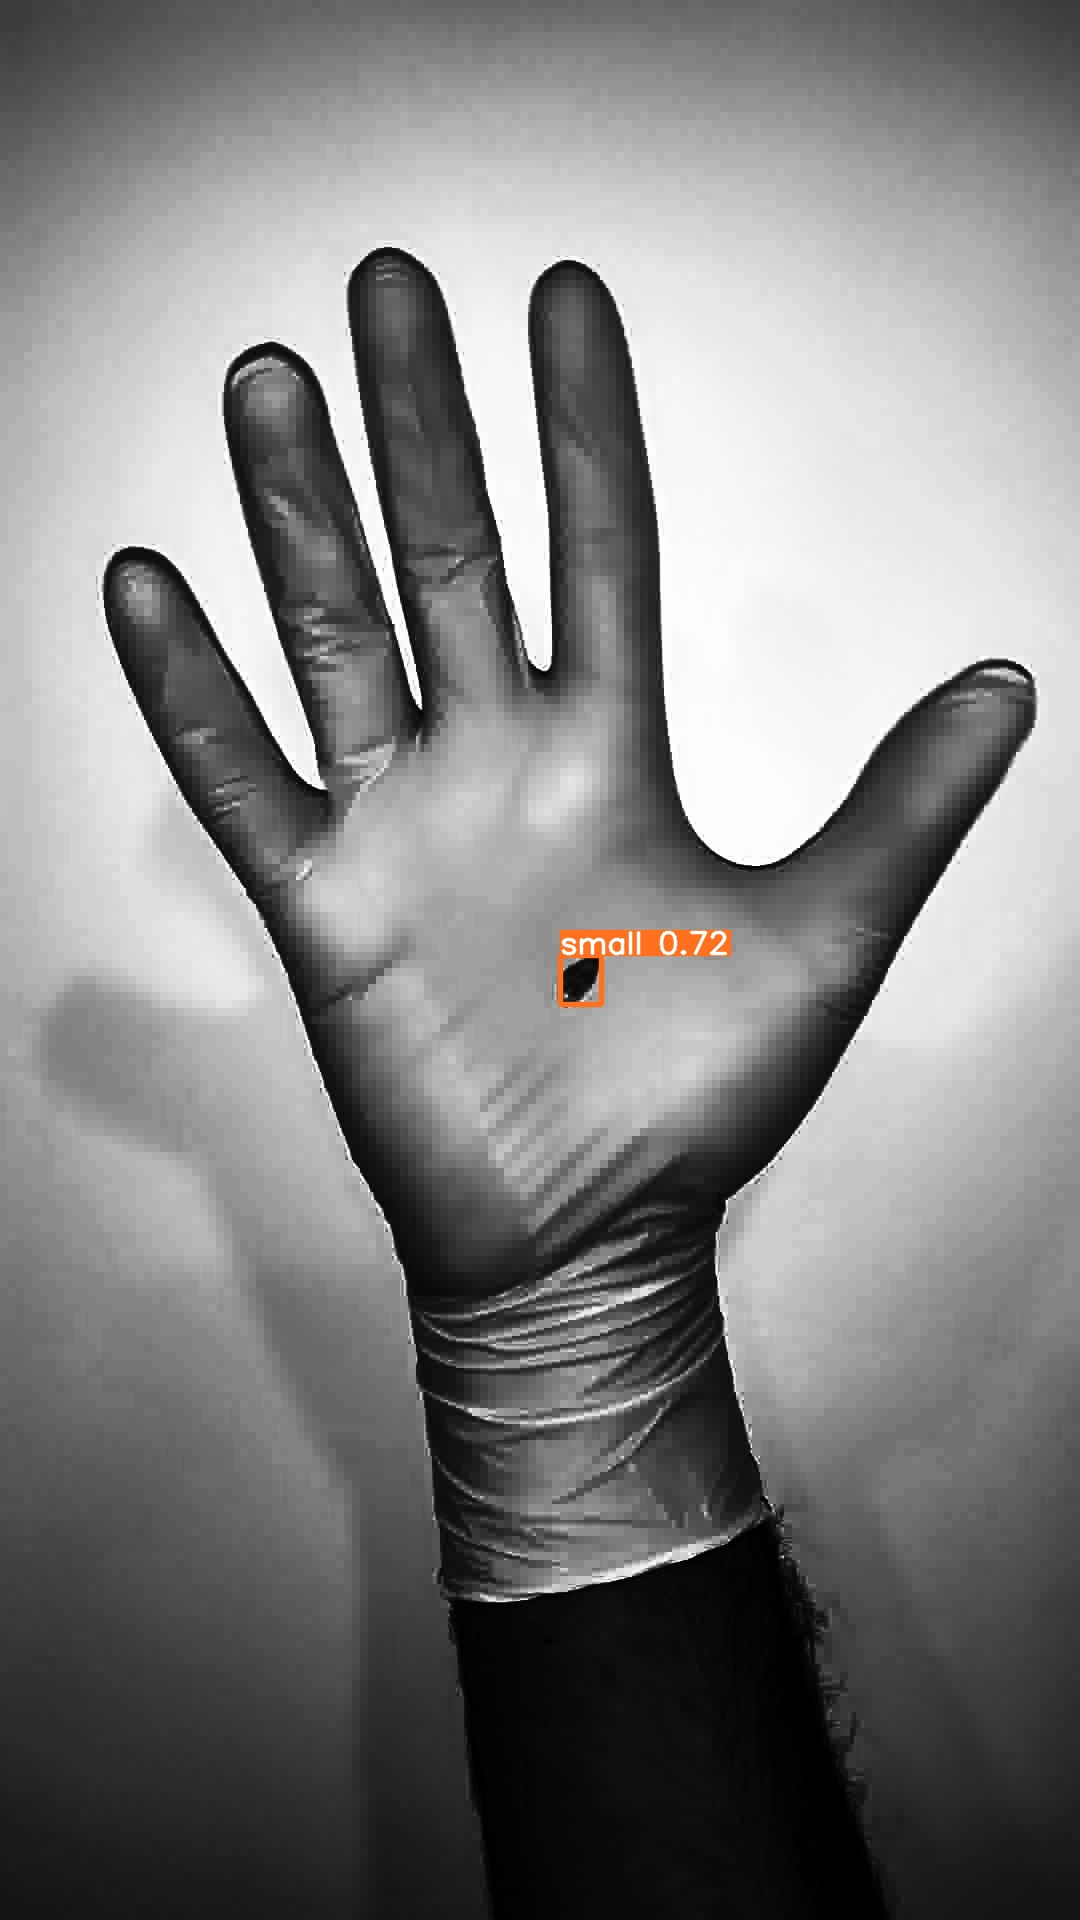

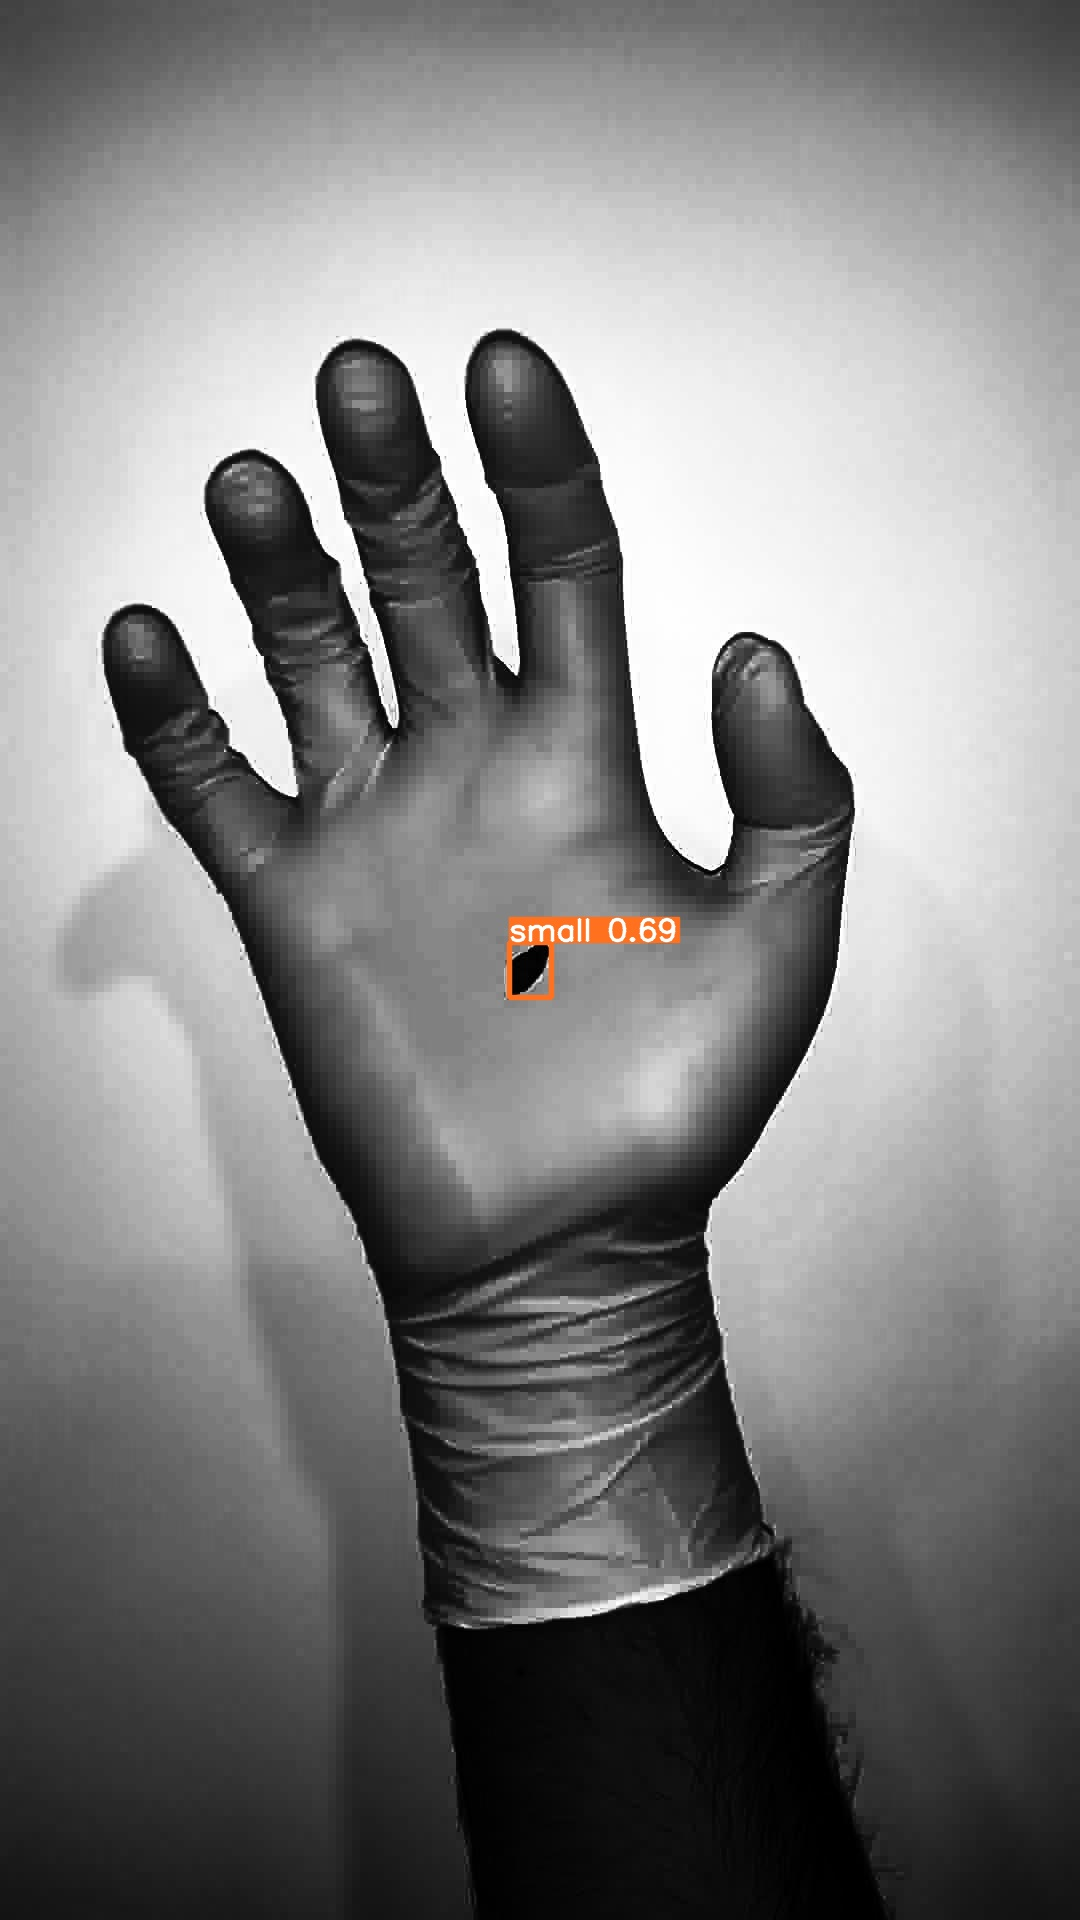

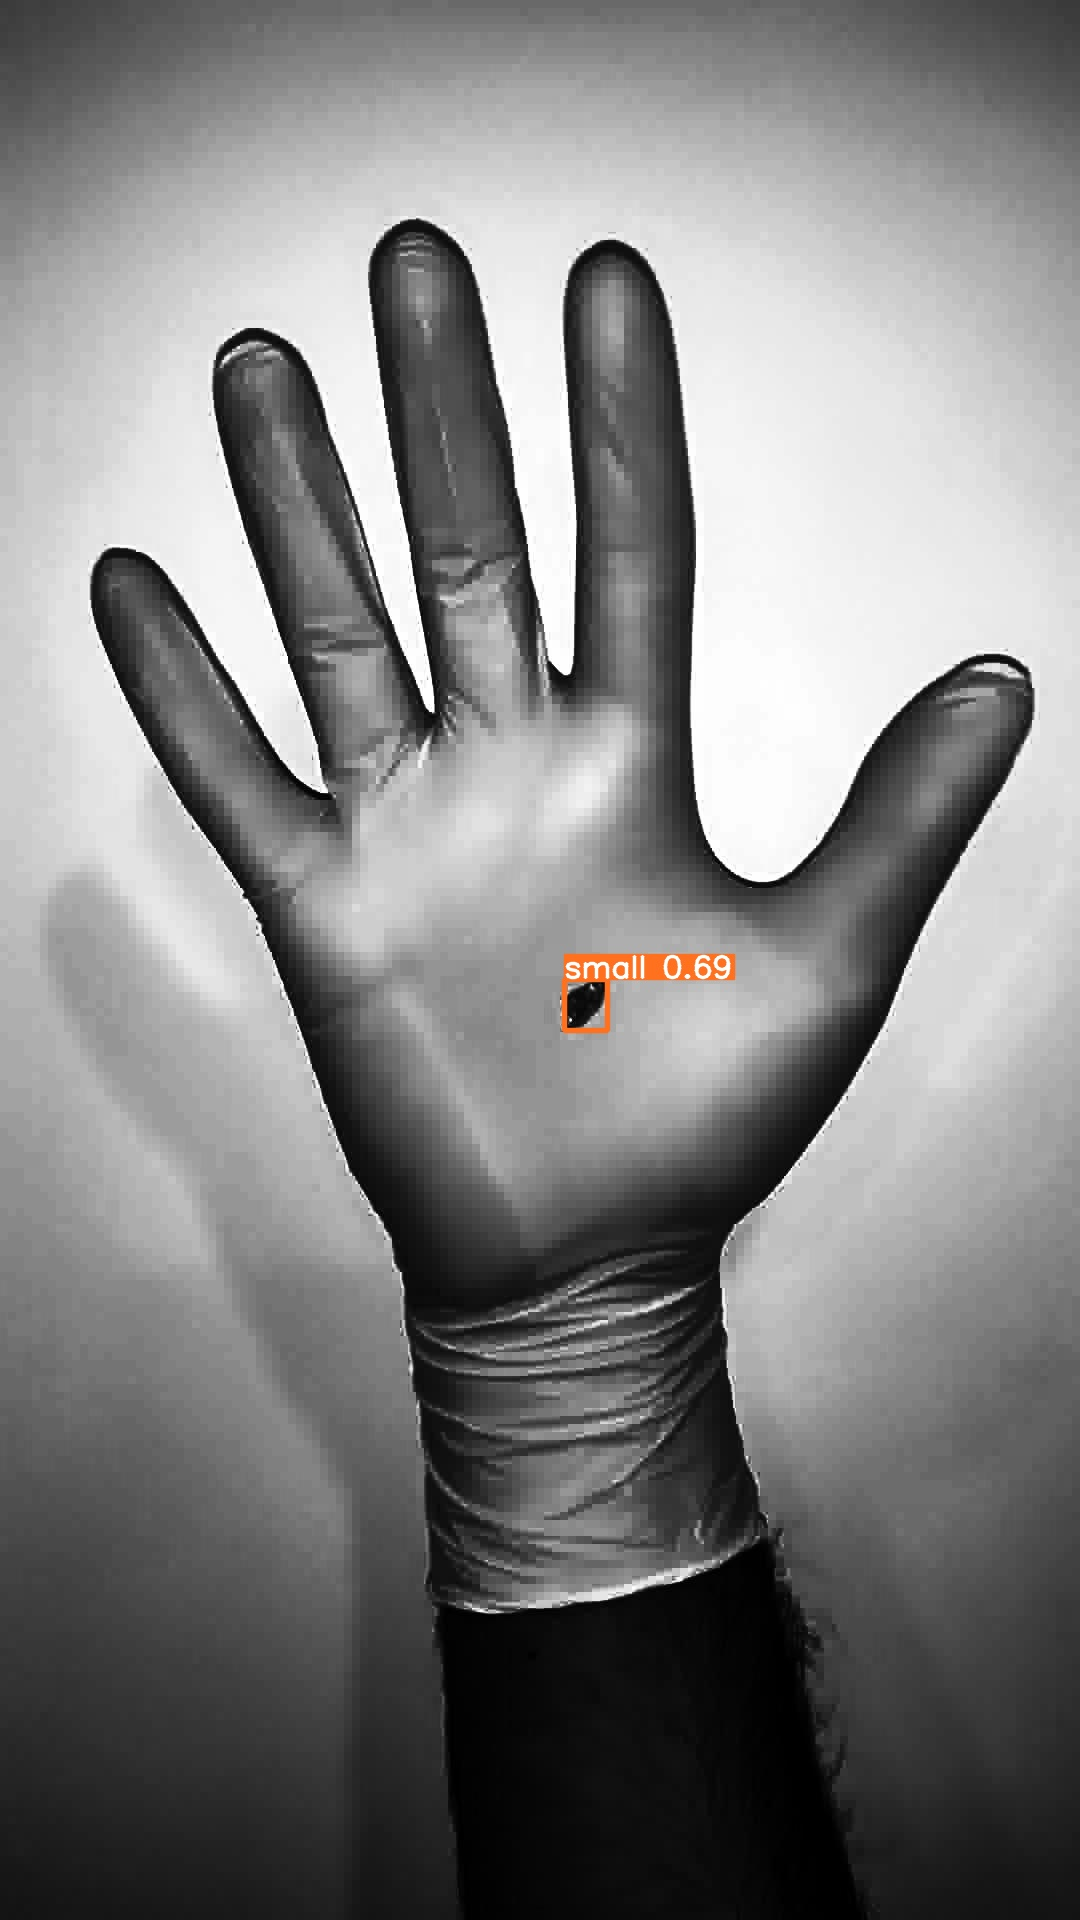

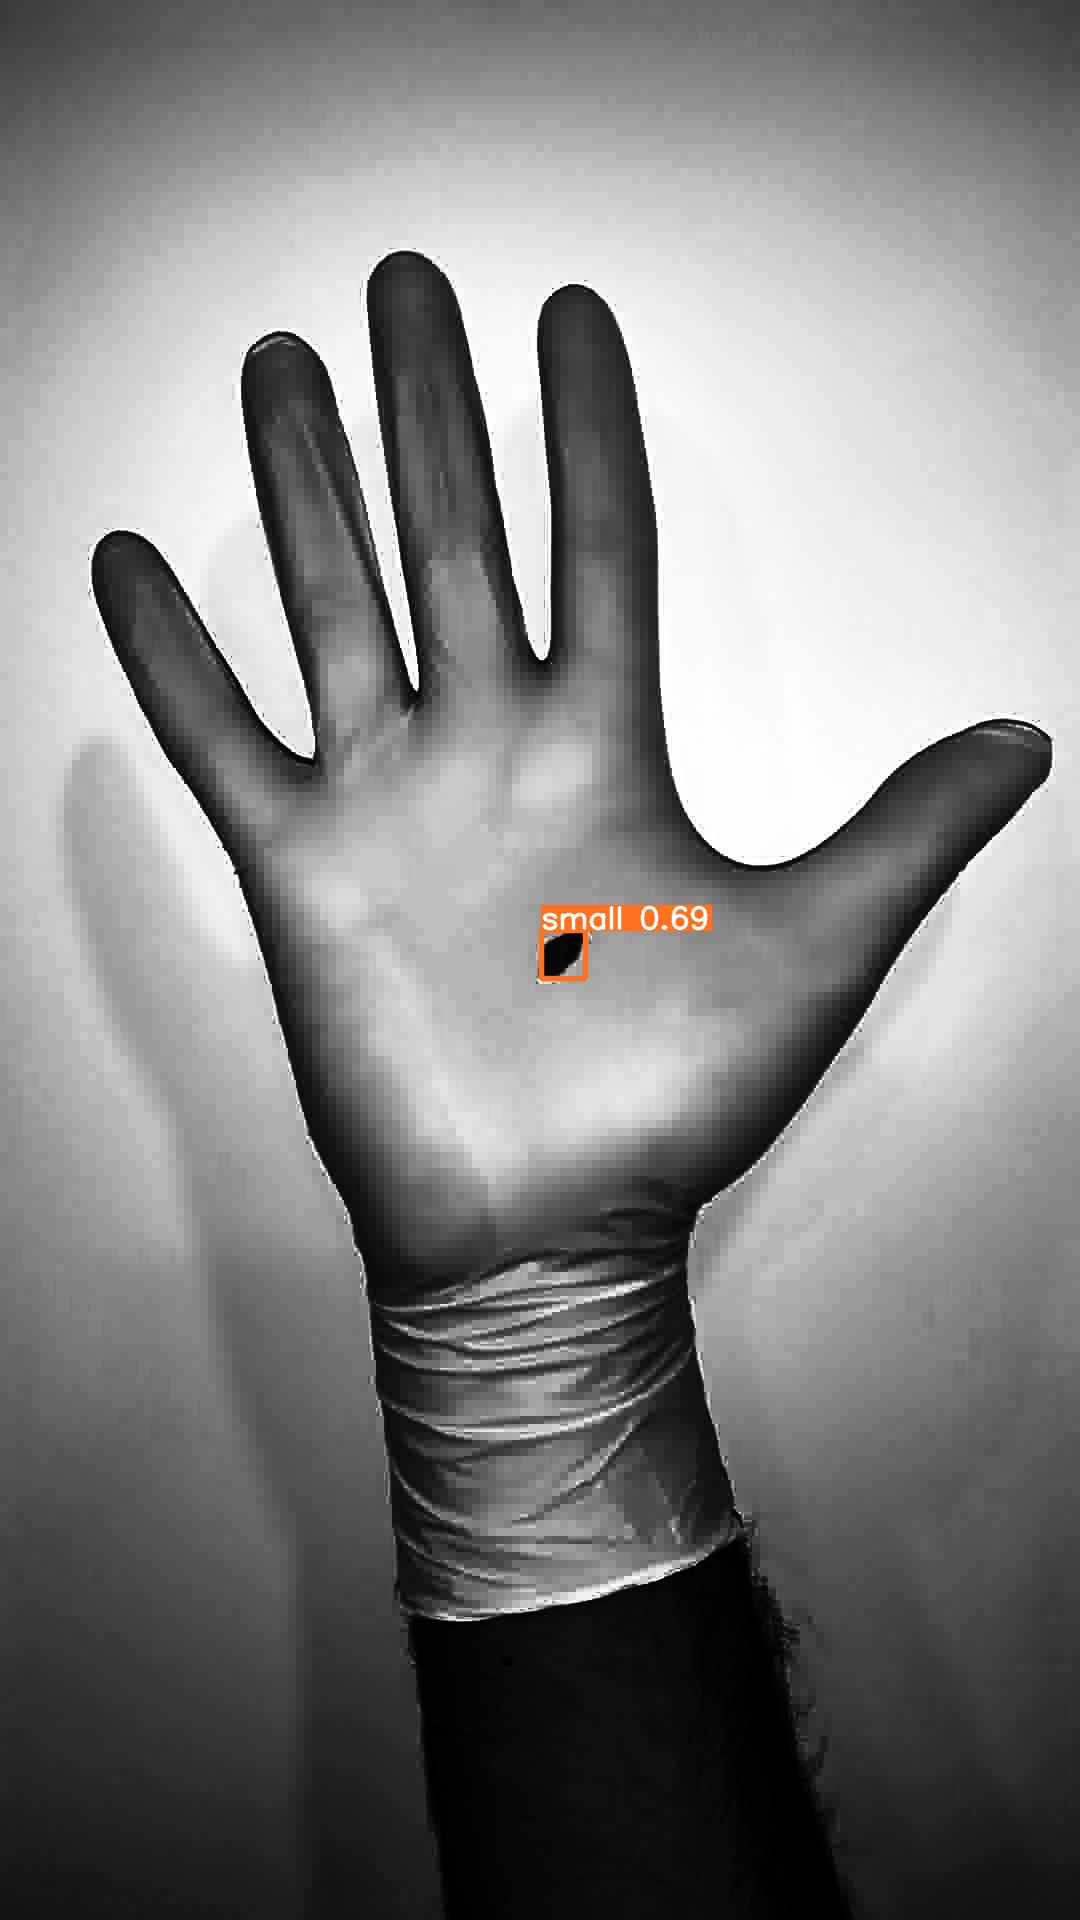

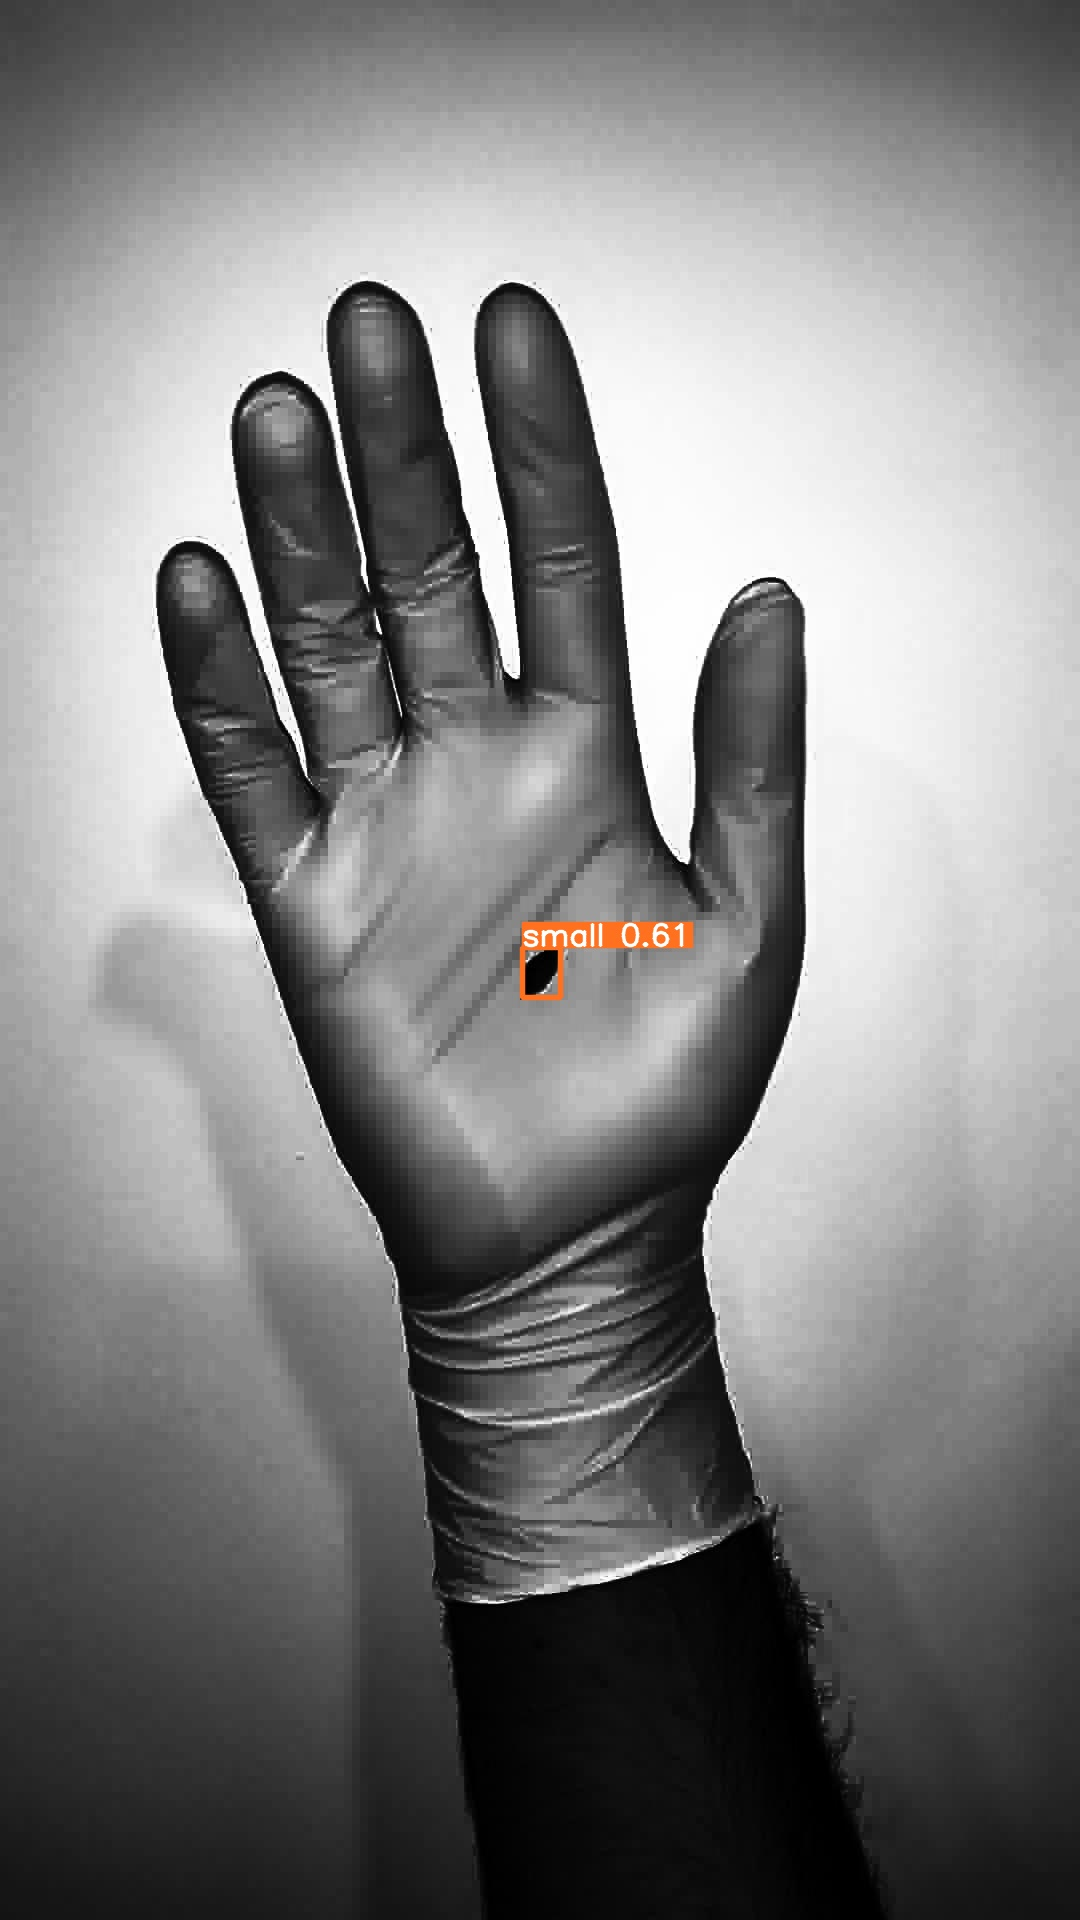

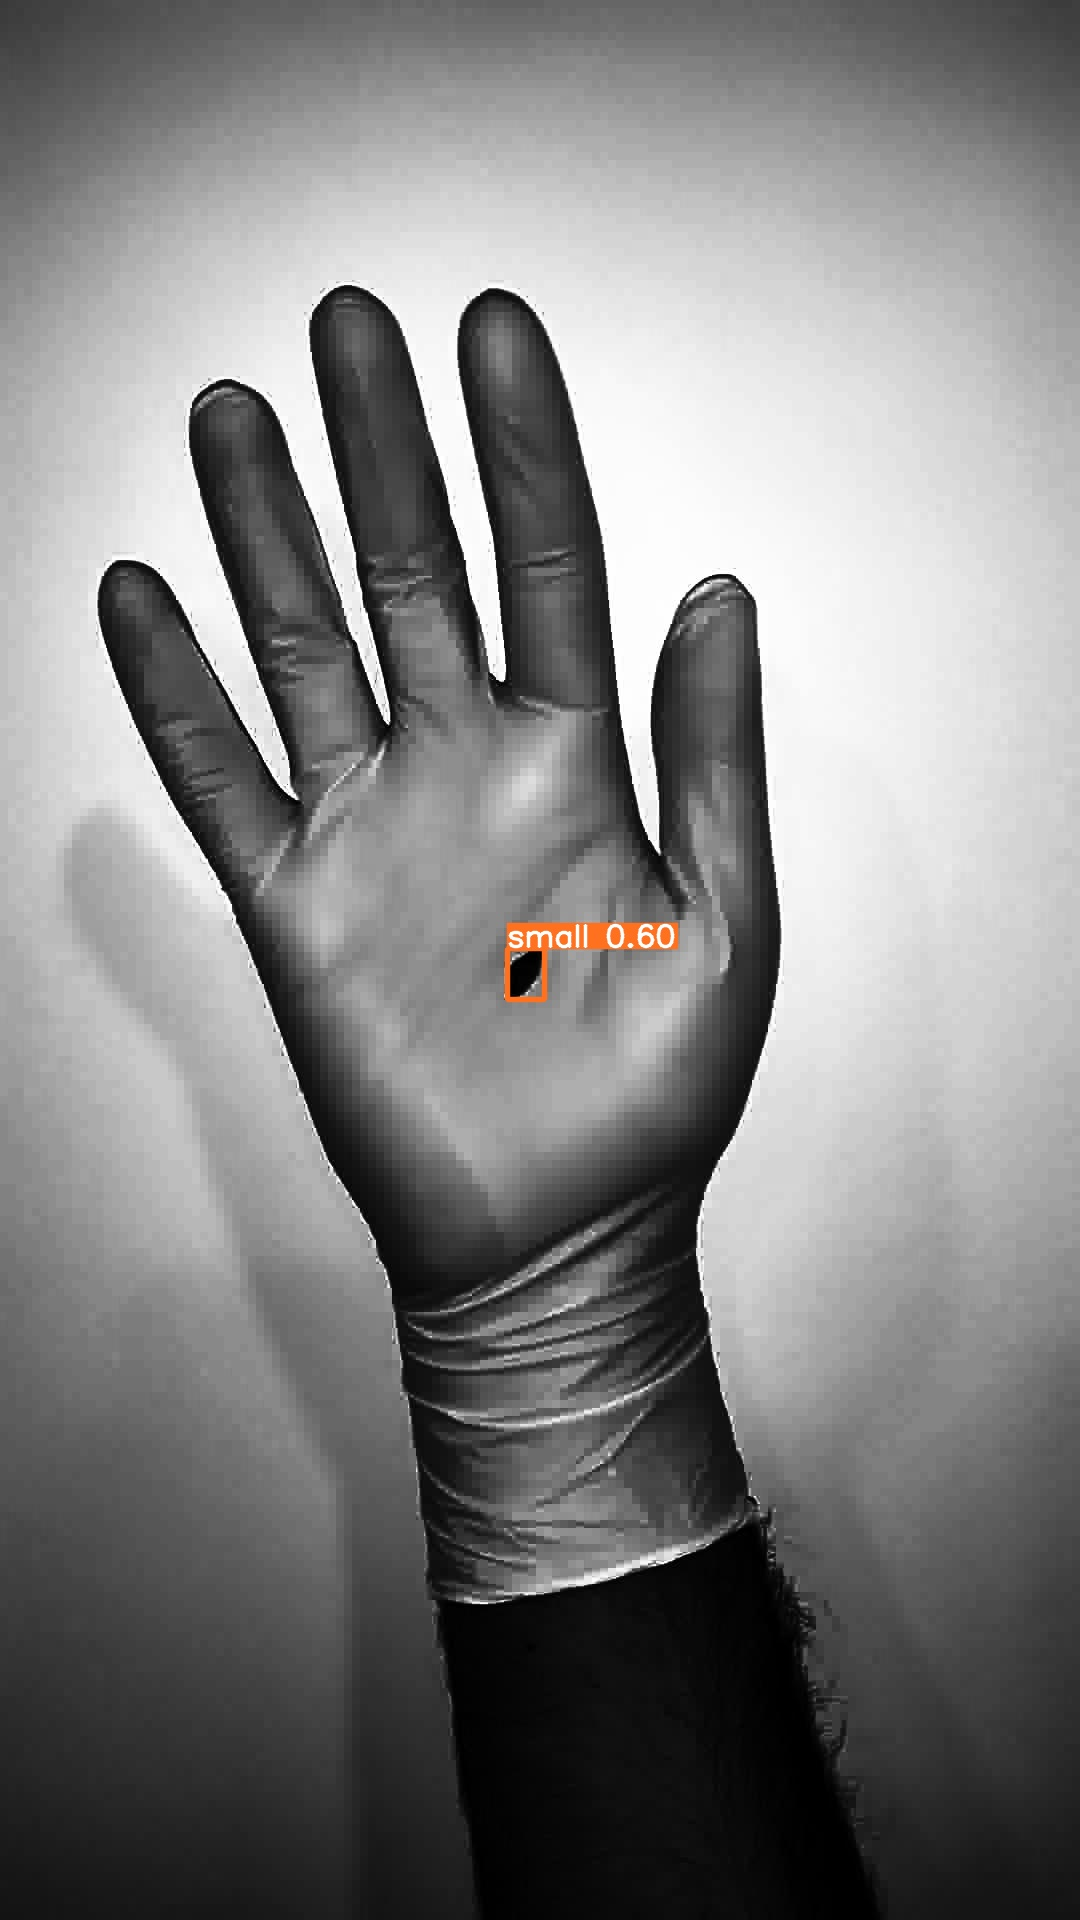

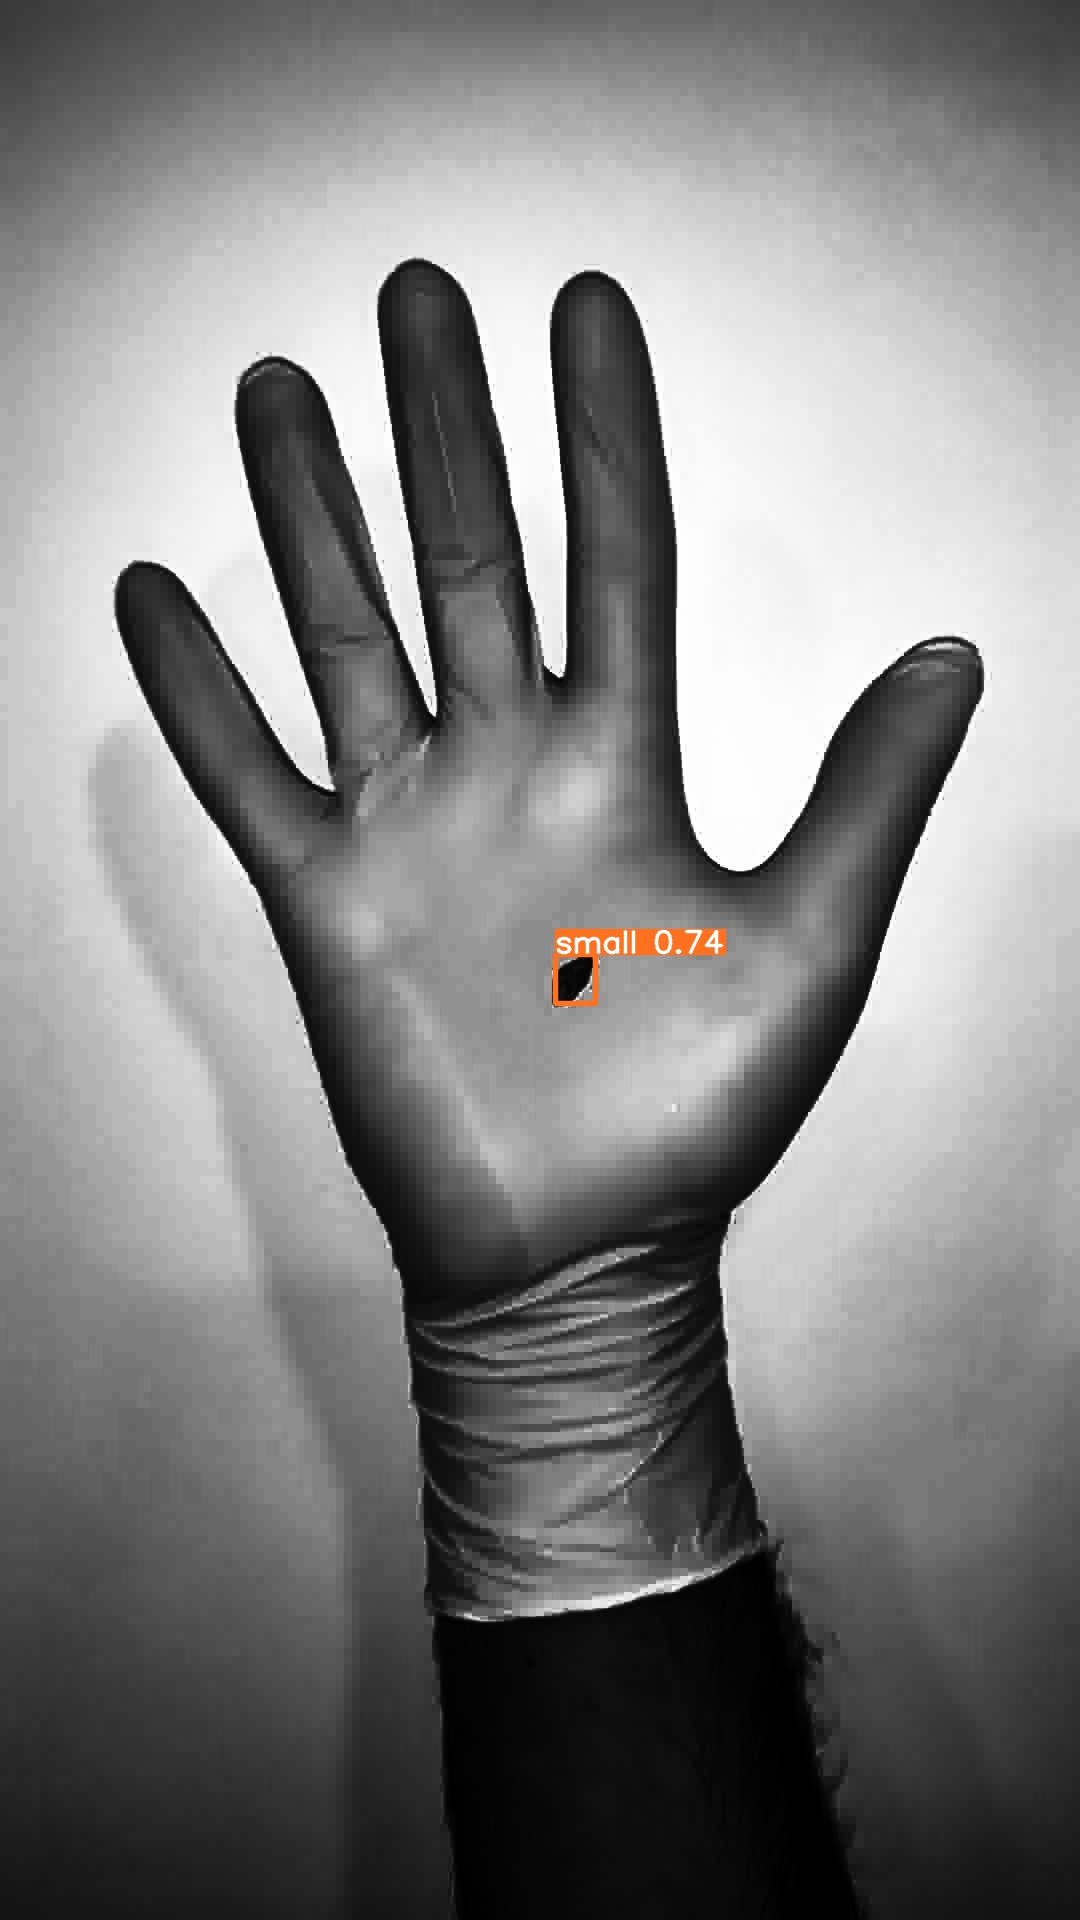

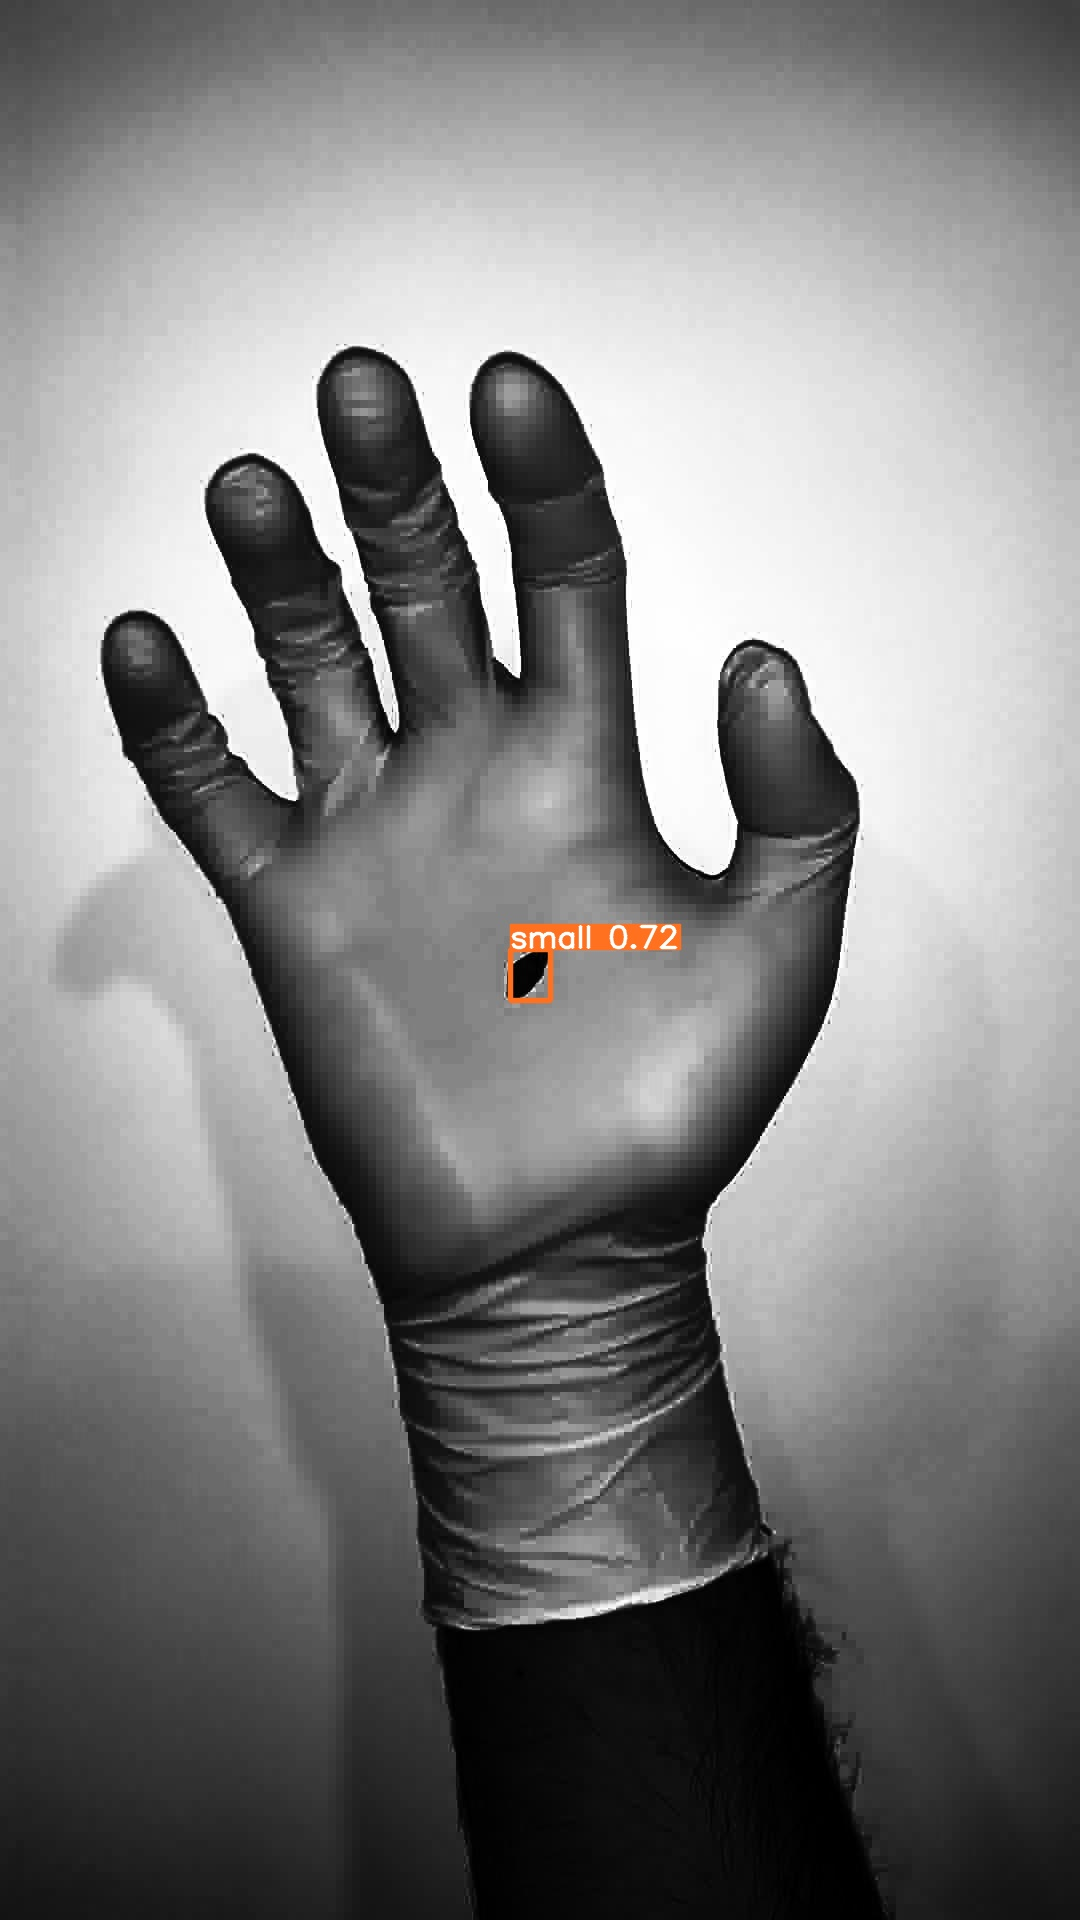

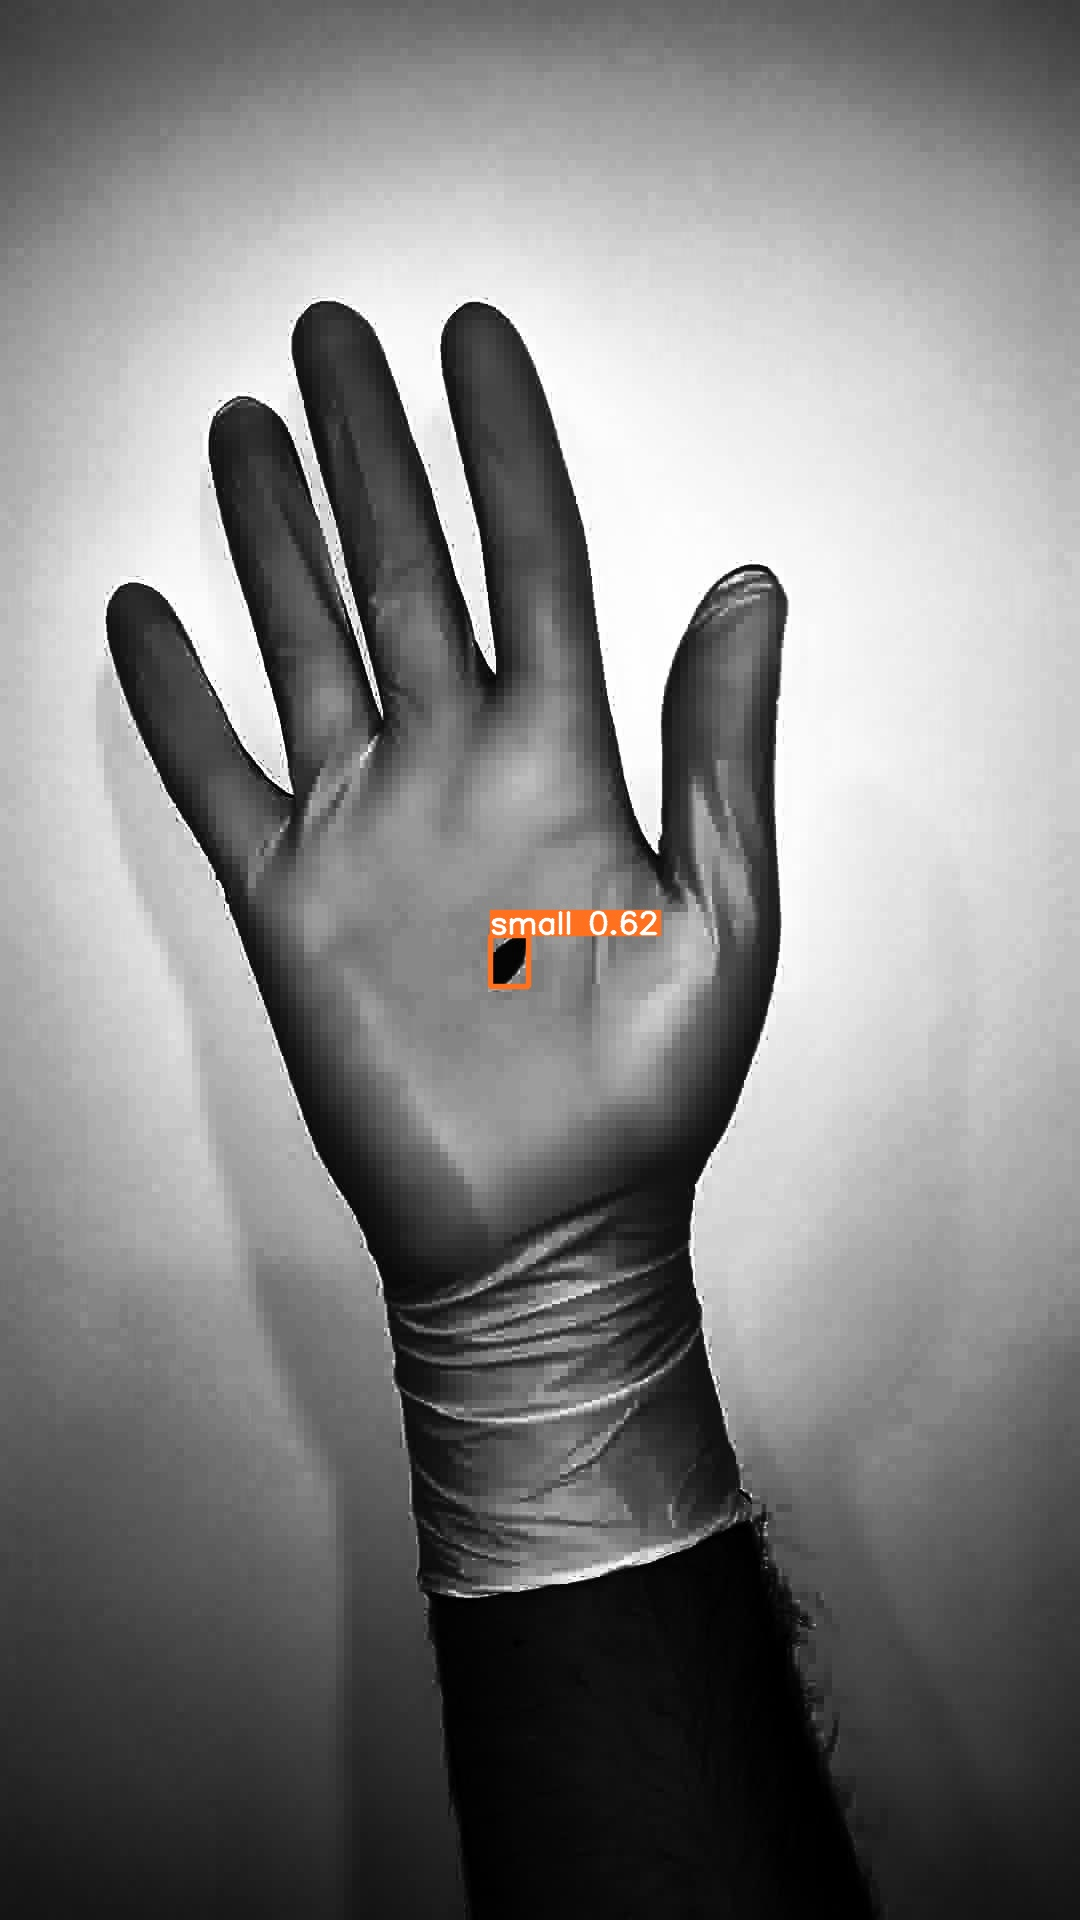

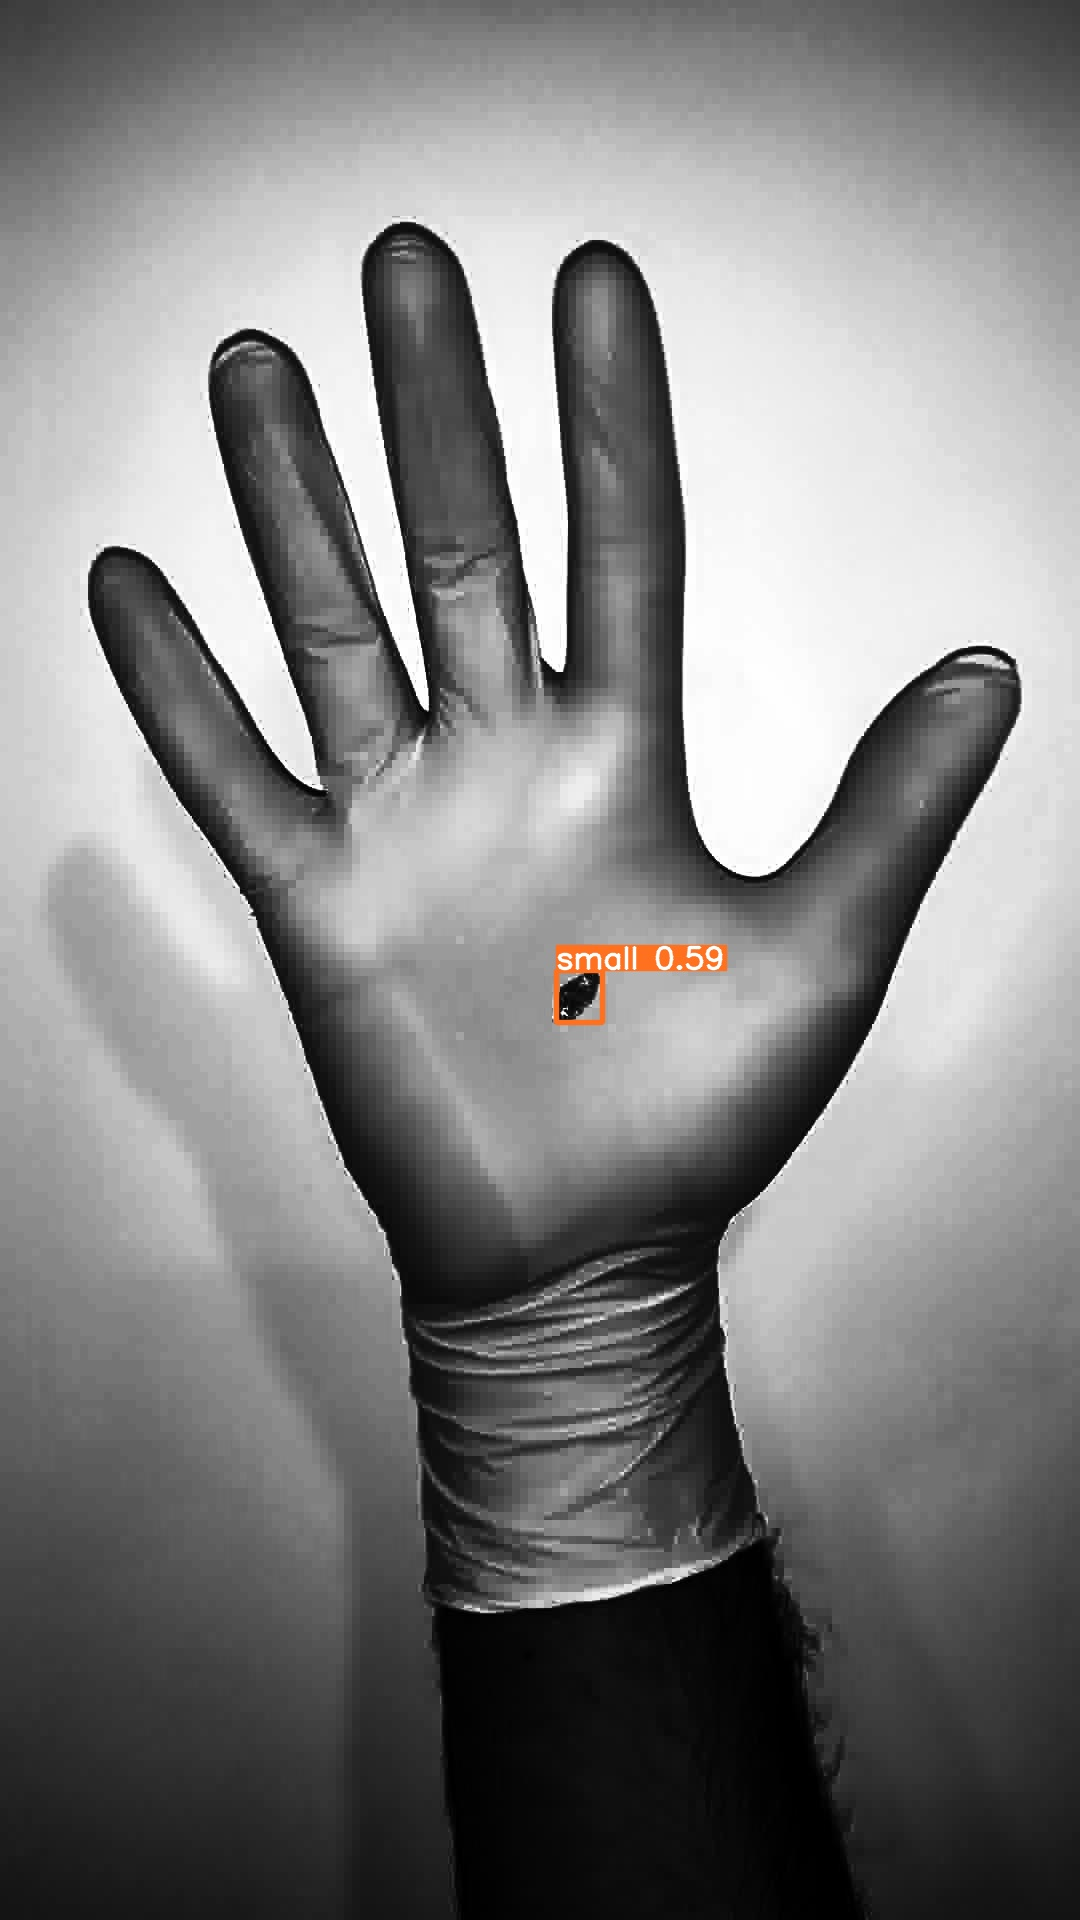

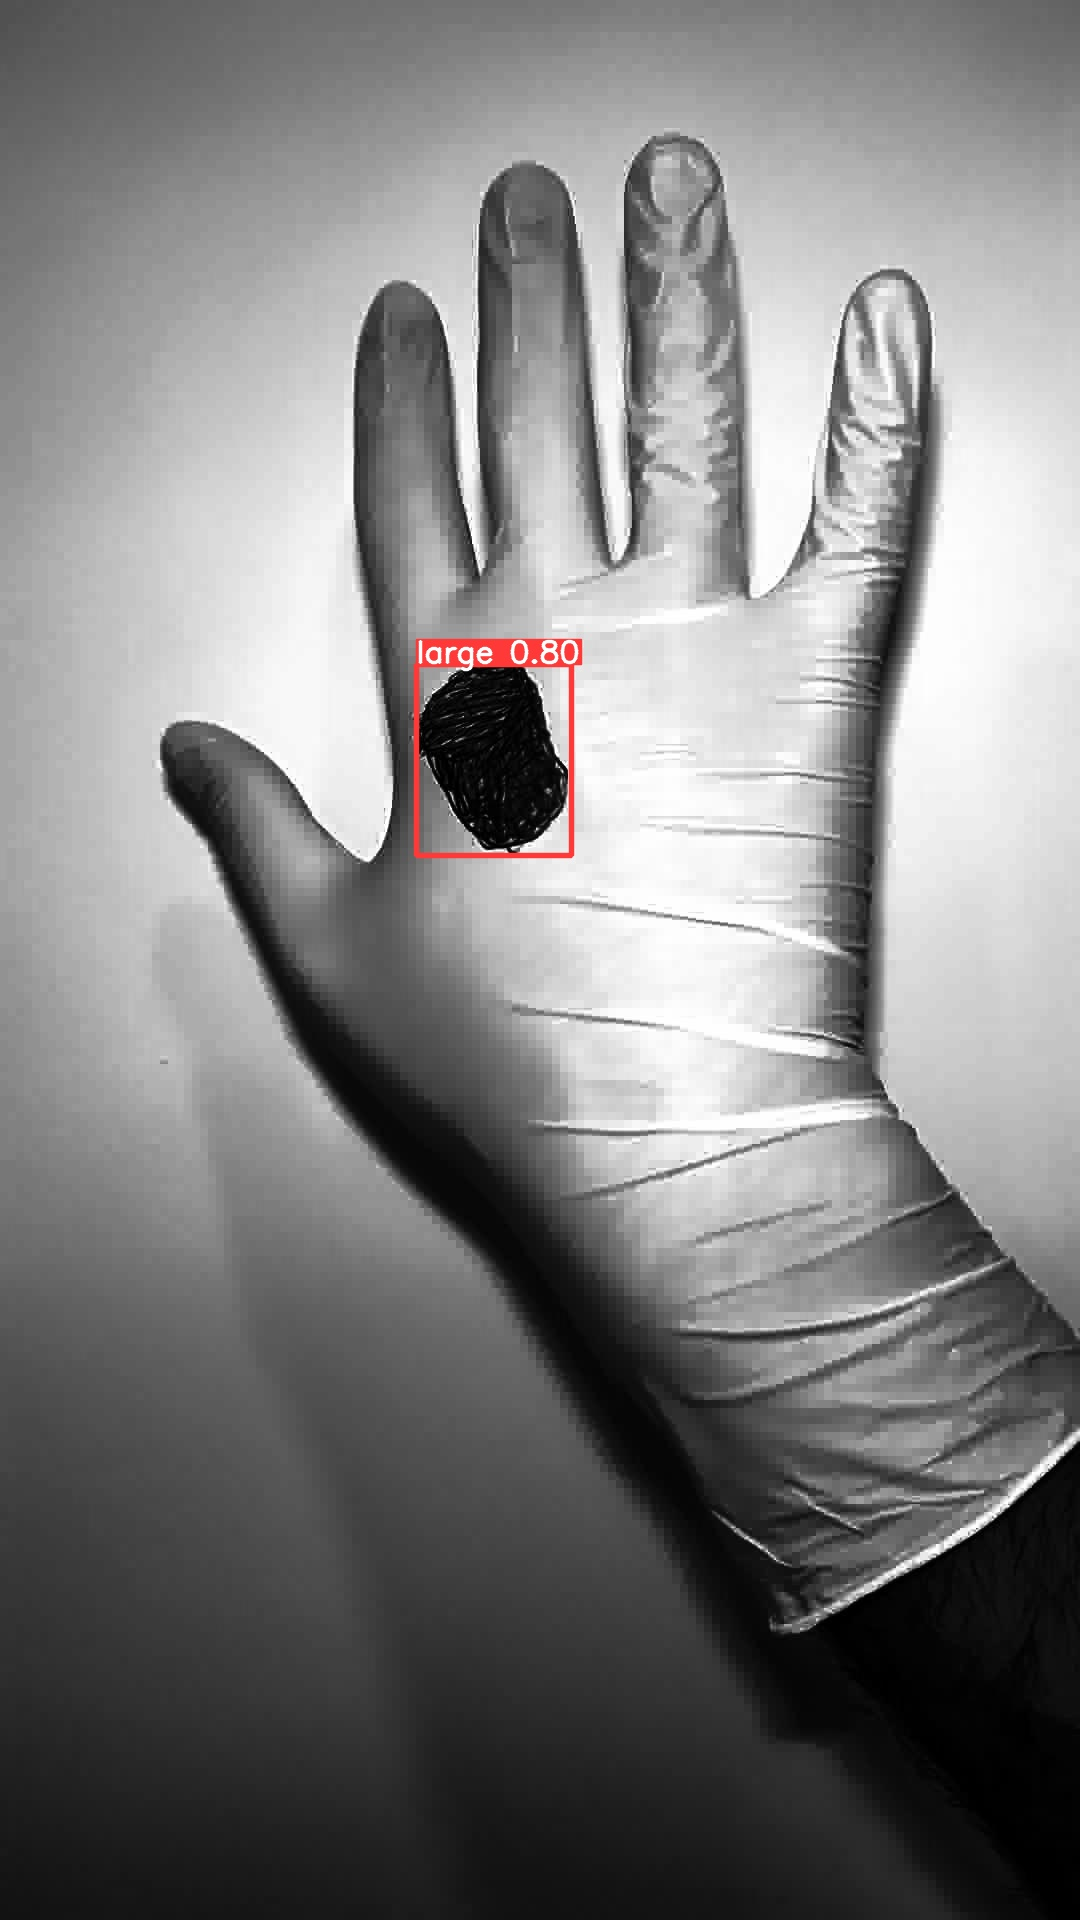

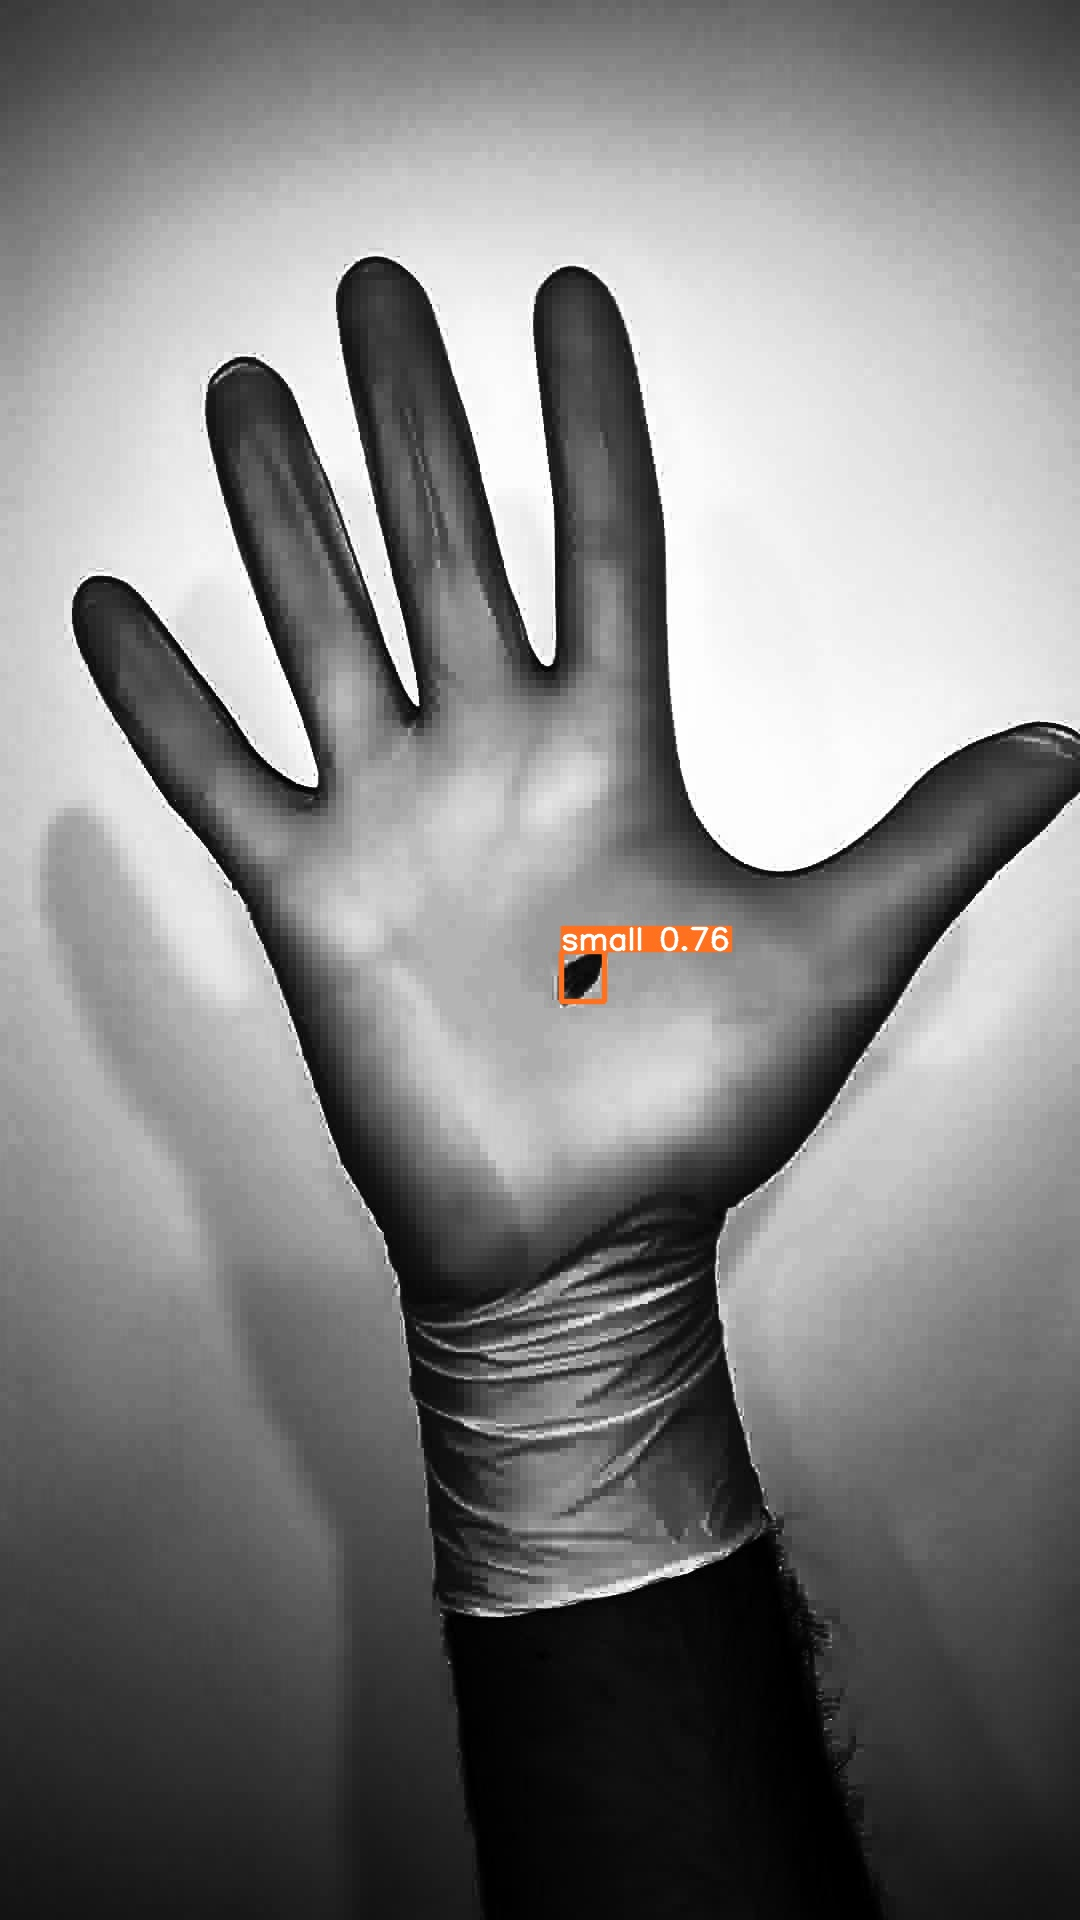

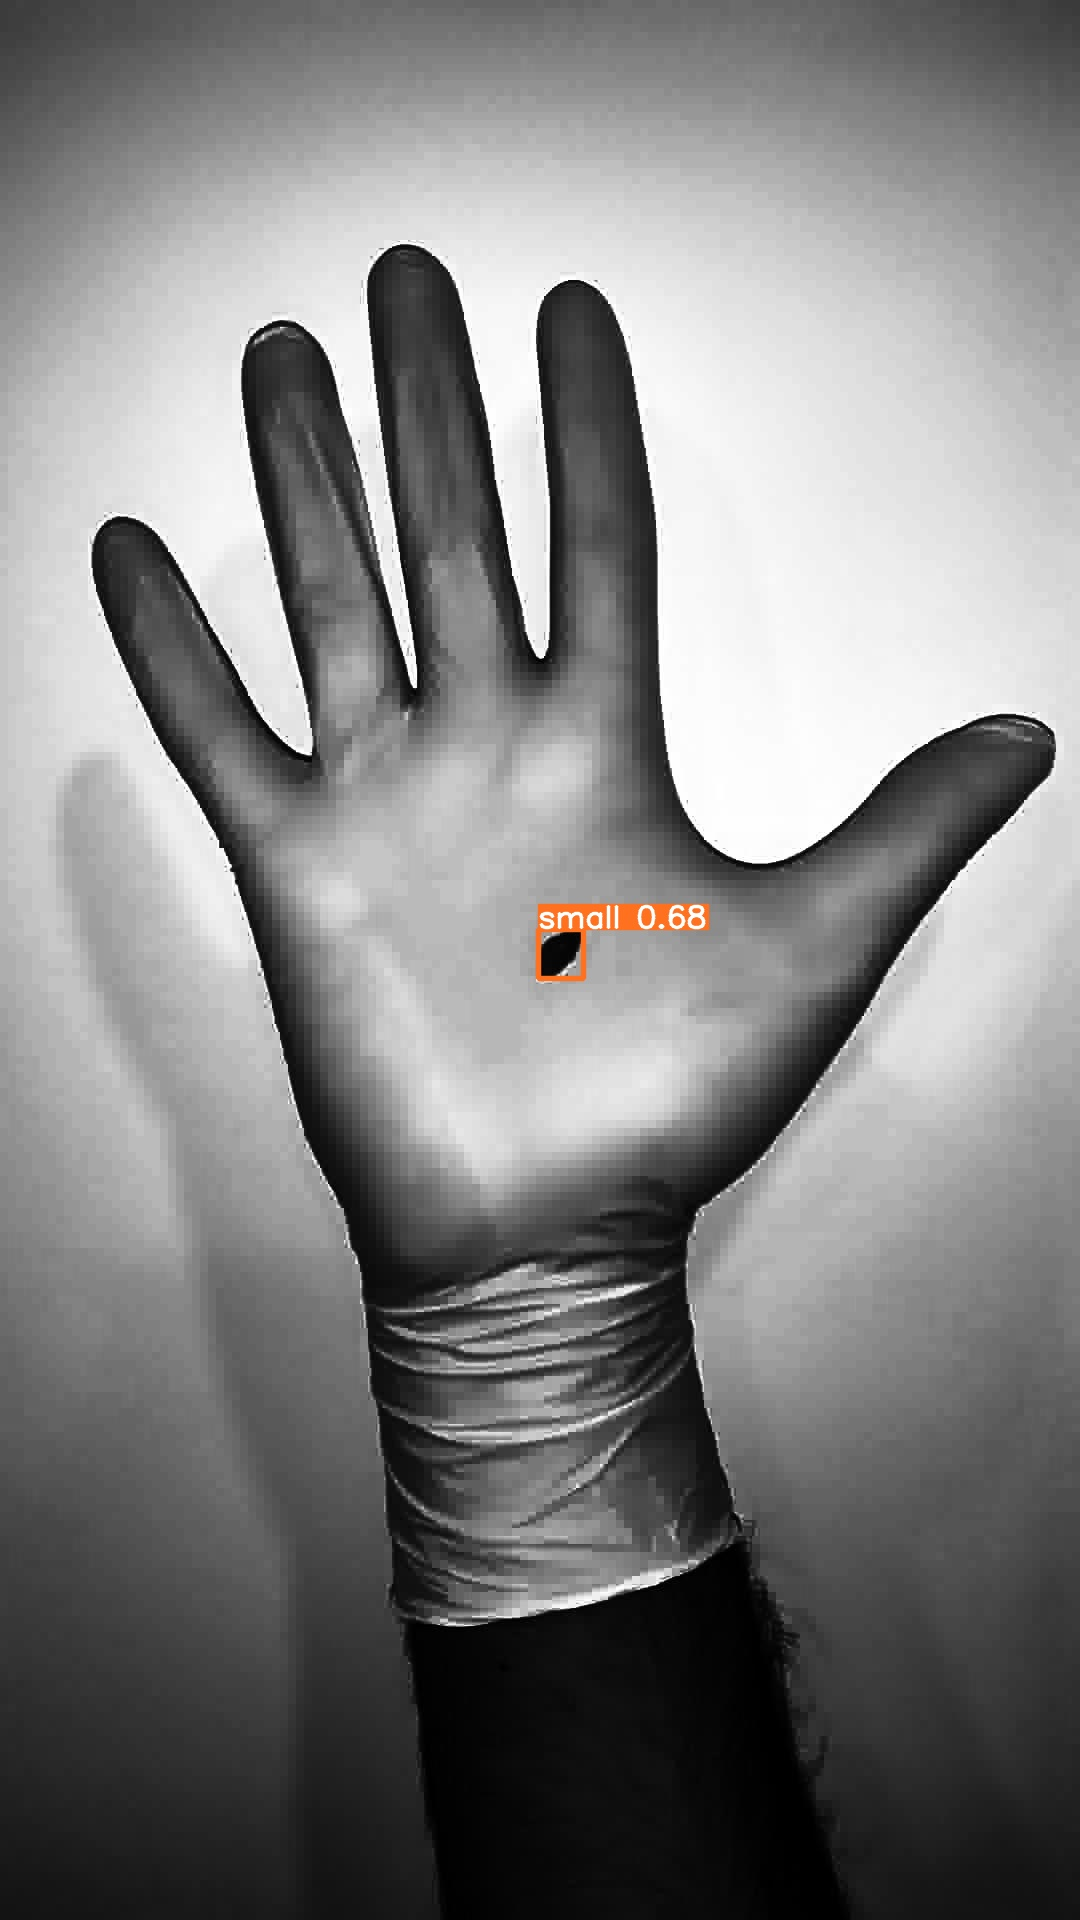

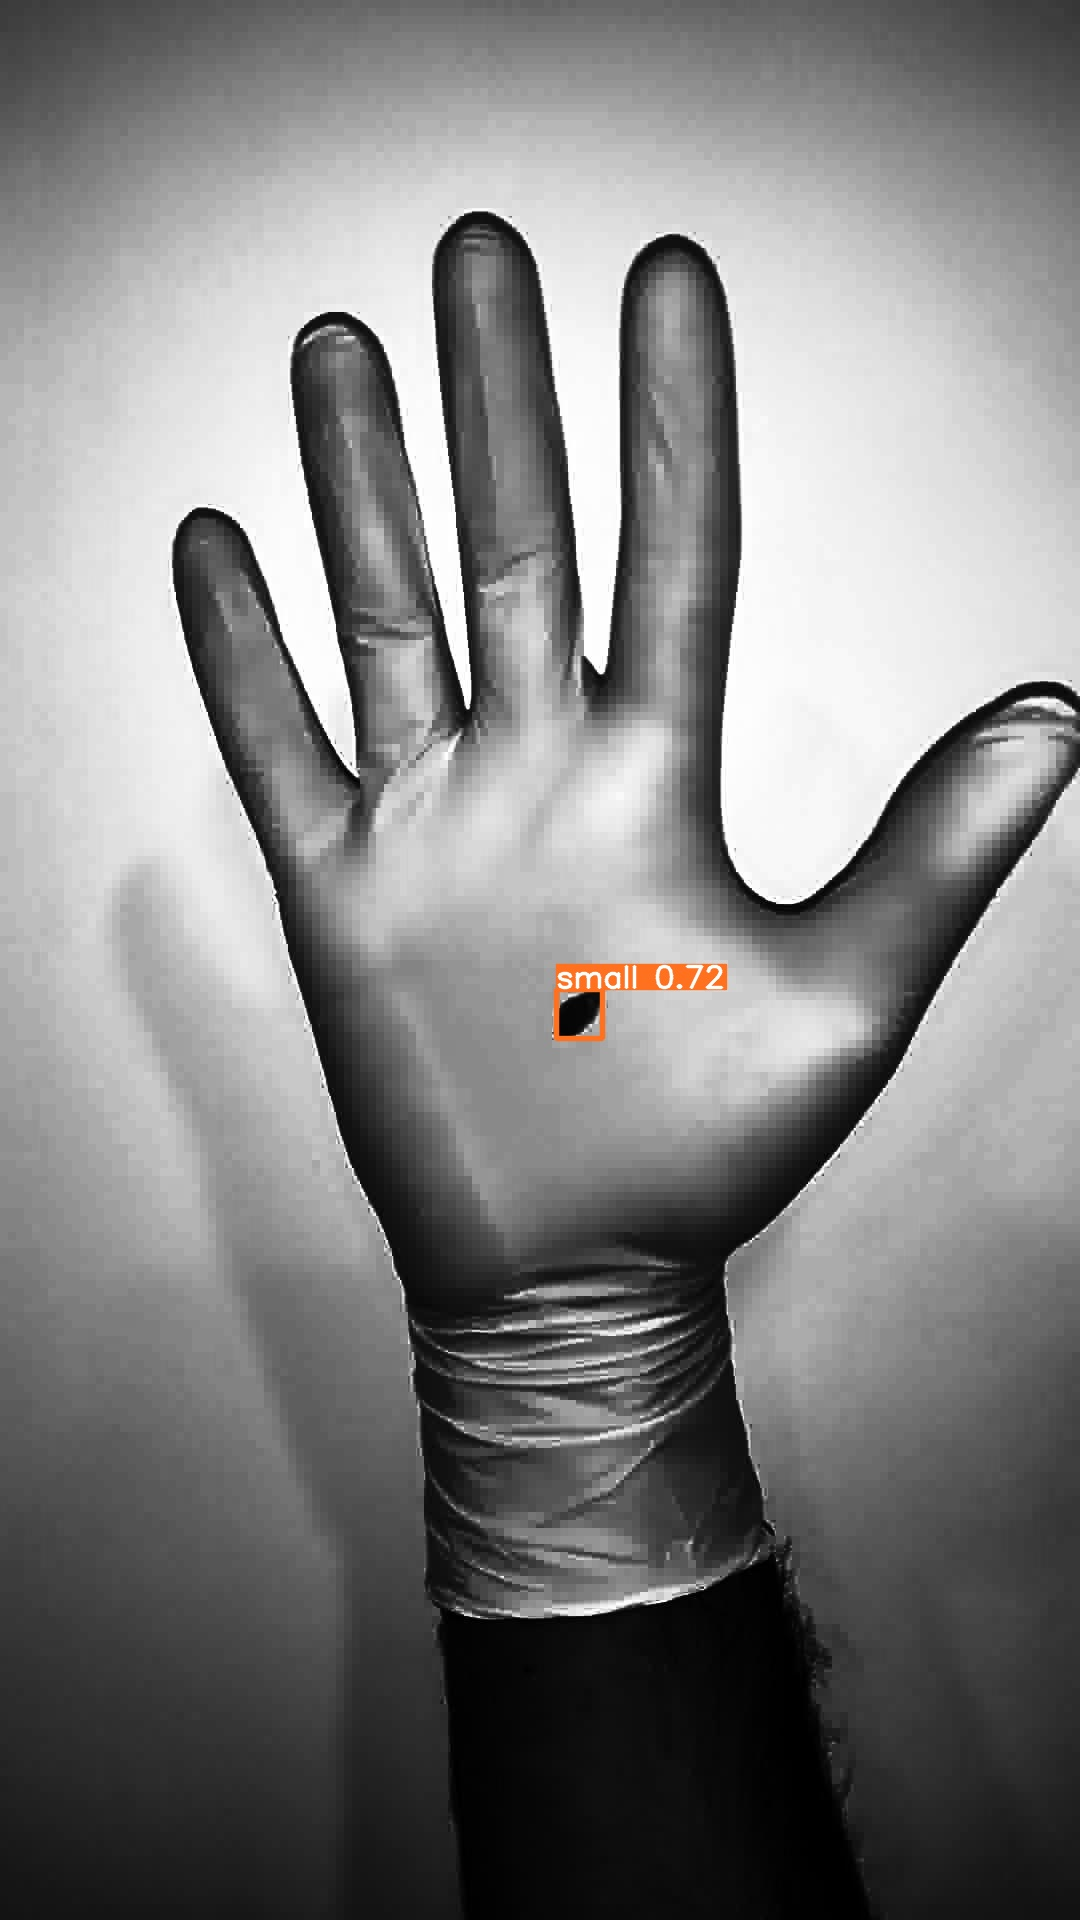

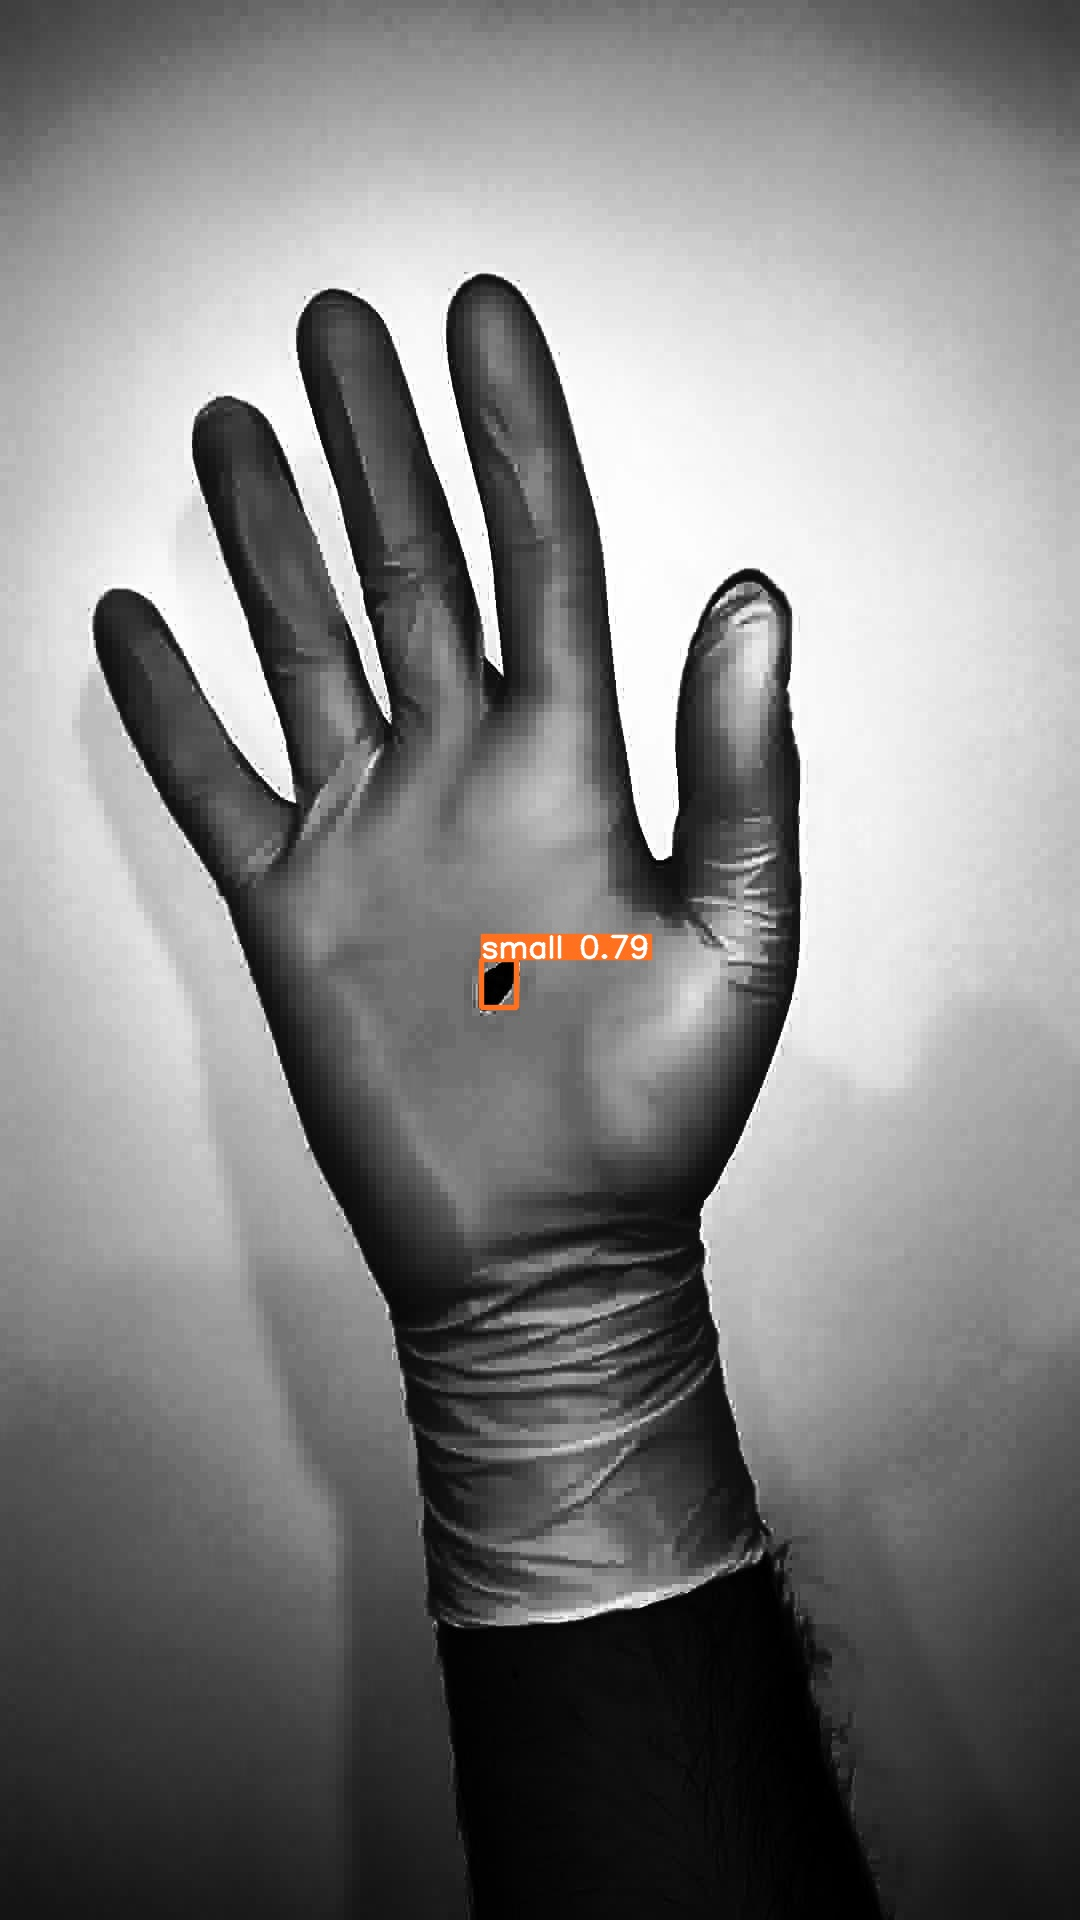

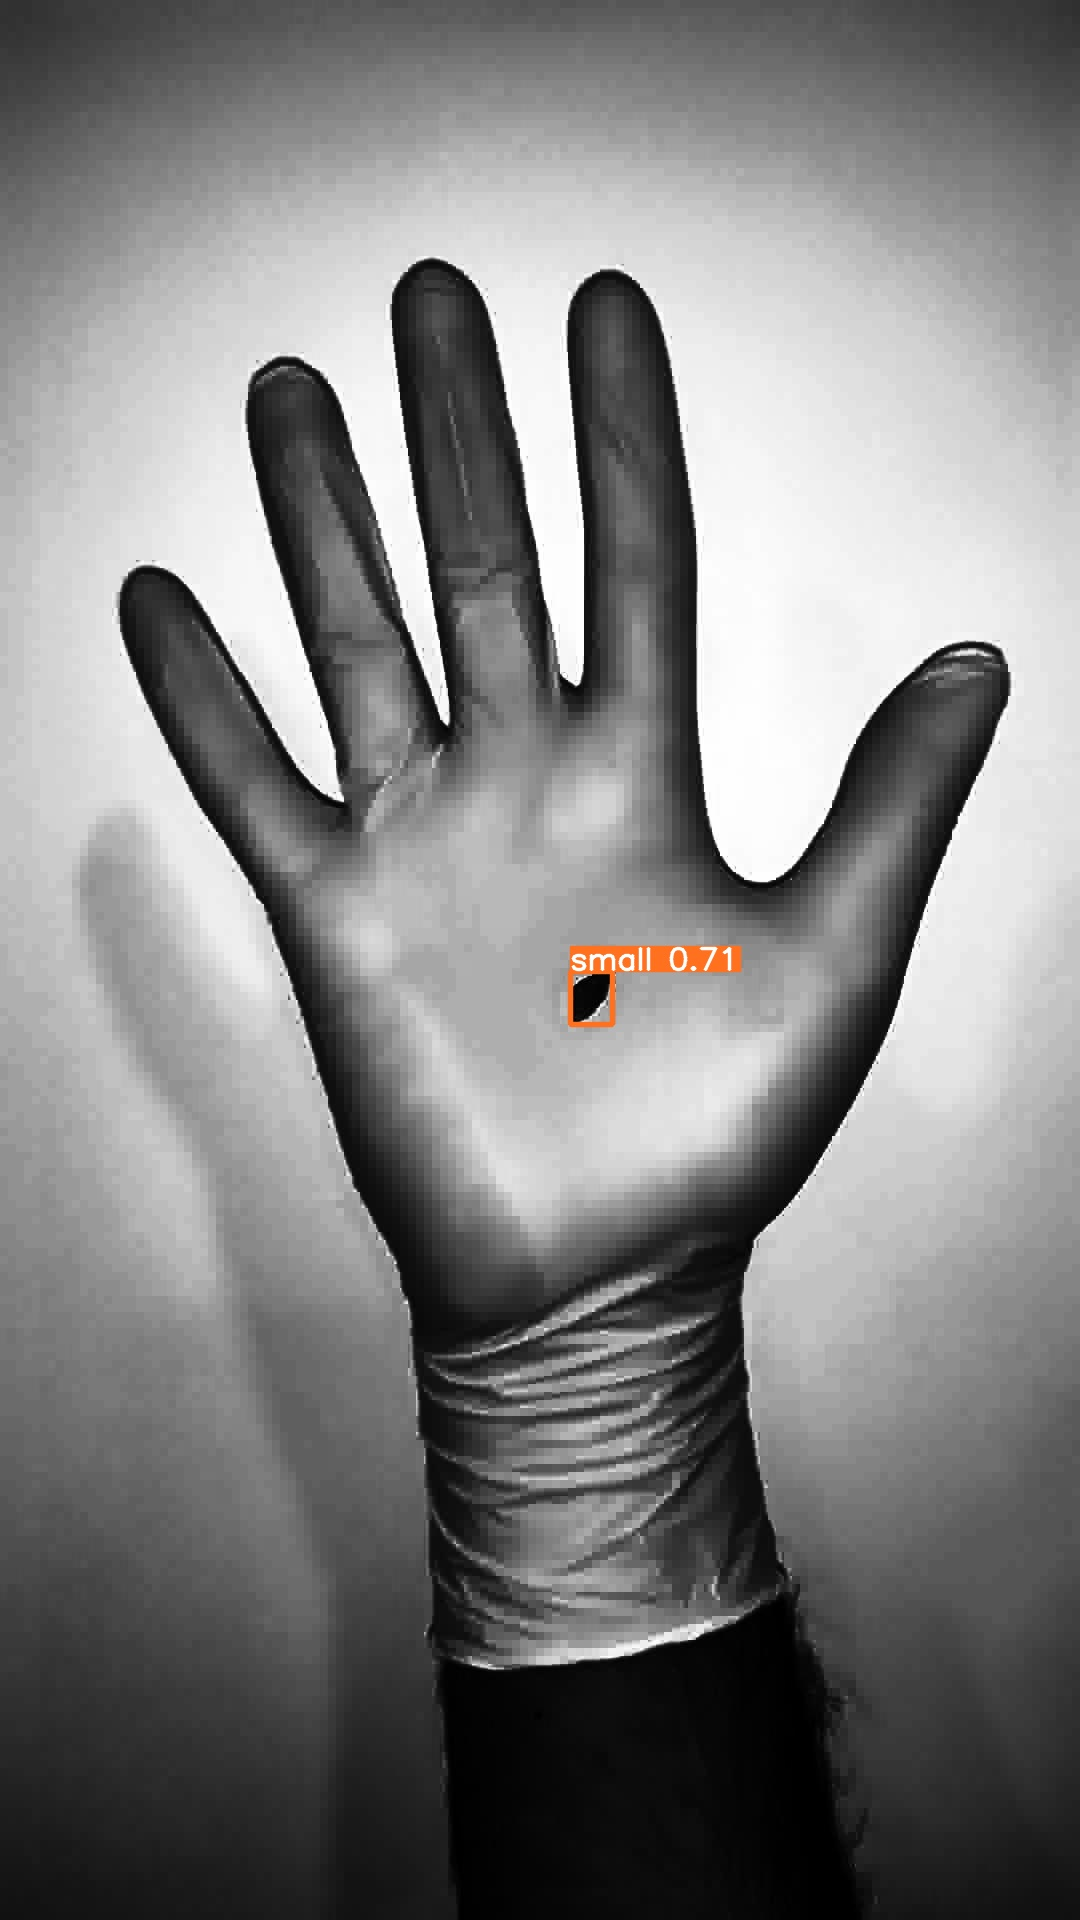

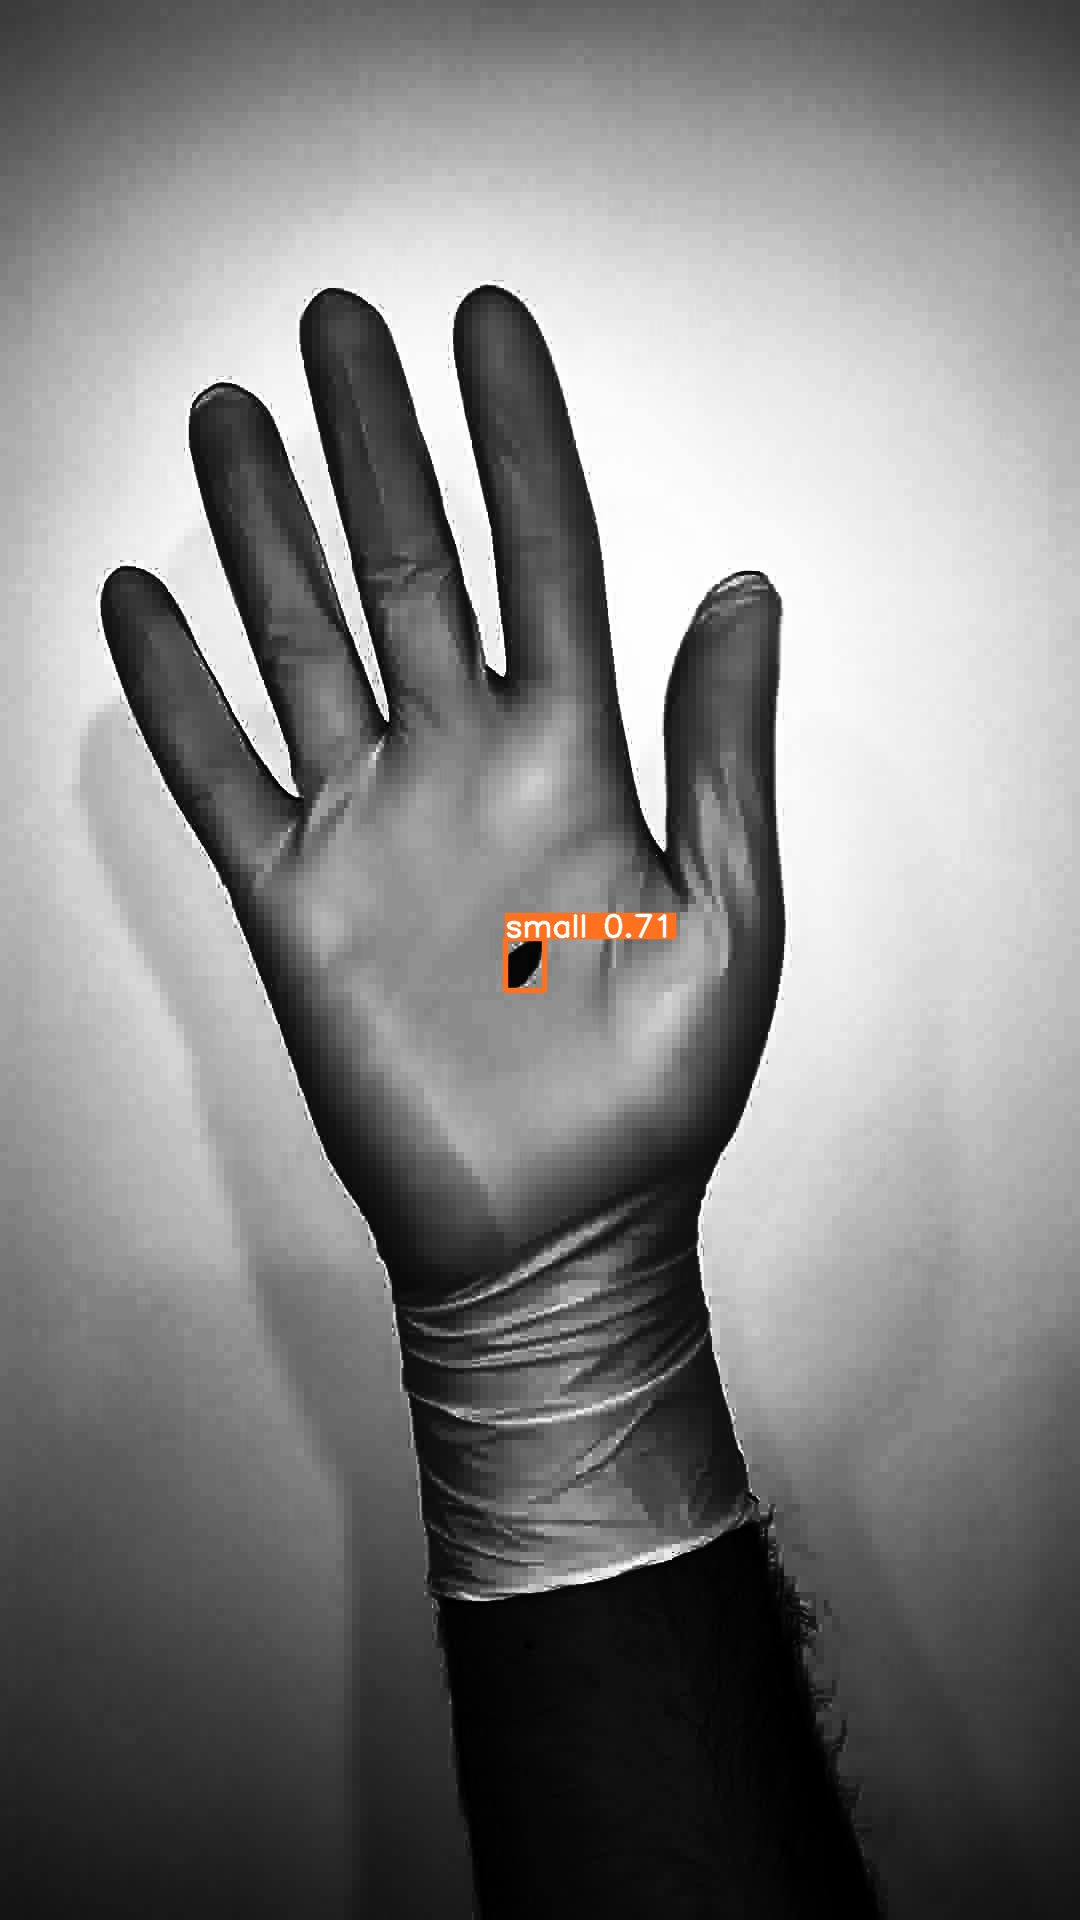

In [ ]:
#DISPLAY INFERENCE TO ALL OF THE TEST IMAGES

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): 
    display(Image(filename=imageName, width=400))

### **SAVING MODEL** 

save the weights, and the entire yolov5 model on desktop, and make sure you place all of tthe codes mentioned above inside the yolov5 folder itself.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive

Mounted at /content/gdrive
cp: cannot stat '/content/yolov5/runs/train/yolov5s_results/weights/best.pt': No such file or directory


In [ ]:
!zip -r /content/yolov5.zip /content/yolov5

	zip warning: name not matched: /content/yolov5

zip error: Nothing to do! (try: zip -r /content/yolov5.zip . -i /content/yolov5)


In [ ]:
from google.colab import files
files.download("/content/yolov5.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>